In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os 
from data_processor import DataProcessor
from data_loader import DataLoader

In [2]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\jaryl\\OneDrive\\Documents\\2019\\Duke\\Capstone\\school-choice\\time-series-study'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
data_loader = DataLoader()
loaded_dfs = data_loader.load_enrollment_data()
school_distrinct_shapefile = data_loader.load_elementary_school_district_shapefile()

In [5]:
loaded_dfs.keys()

dict_keys(['page2\\enrollment_10_11', 'page2\\enrollment_11_12', 'page2\\enrollment_12_13', 'page2\\enrollment_13_14', 'page2\\enrollment_14_15', 'page2\\enrollment_15_16', 'page2\\enrollment_16_17', 'page2\\enrollment_17_18', 'page2\\enrollment_18_19', 'page2\\enrollment_19_20'])

In [6]:
for i in loaded_dfs.keys():
    print(i[-16:])

enrollment_10_11
enrollment_11_12
enrollment_12_13
enrollment_13_14
enrollment_14_15
enrollment_15_16
enrollment_16_17
enrollment_17_18
enrollment_18_19
enrollment_19_20


In [7]:
old_keys = list(loaded_dfs.keys())

In [8]:
for i in old_keys:
    new_key = i[-16:]
    loaded_dfs[new_key] = loaded_dfs[i]
    #del loaded_dfs[i]
for i in old_keys:
    del loaded_dfs[i]

In [9]:
loaded_dfs.keys()

dict_keys(['enrollment_10_11', 'enrollment_11_12', 'enrollment_12_13', 'enrollment_13_14', 'enrollment_14_15', 'enrollment_15_16', 'enrollment_16_17', 'enrollment_17_18', 'enrollment_18_19', 'enrollment_19_20'])

In [10]:
school_distrinct_shapefile.head()

OBJECTID facilityid stateid                           name  \
0         1     102760  320319    Creekside Elementary School   
1         4      10537  320313       Easley Elementary School   
2         7     112151  320310      Eastway Elementary School   
3        10     127429  320327  Hope Valley Elementary School   
4        13     133728  320304     Bethesda Elementary School   

                                 disttype   distarea  CreationDa   Creator  \
0  Elementary School Base Assignment Zone  24.173063  2018-07-11  QUAYETRI   
1  Elementary School Base Assignment Zone   7.109131  2018-11-08  QUAYETRI   
2  Elementary School Base Assignment Zone   2.074538  2018-07-11  QUAYETRI   
3  Elementary School Base Assignment Zone   5.368242  2018-07-11  QUAYETRI   
4  Elementary School Base Assignment Zone  27.476374  2018-07-11  QUAYETRI   

     EditDate  Editor    ShortName  \
0  2019-02-21  GISDIV    Creekside   
1  2019-02-21  GISDIV       Easley   
2  2019-02-21  GISDIV      Eastway   
3  2019-02-21  GISDIV  Hope Valley   
4  2019-02-21  GISDIV     Bethesda   

                                           LearnMore    SHAPESTAre  \
0  https://www.dpsnc.net/site/default.aspx?PageTy...  6.426582e+08   
1  https://www.dpsnc.net/site/default.aspx?PageTy...  1.981912e+08   
2  https://www.dpsnc.net/site/default.aspx?PageTy...  5.783481e+07   
3  https://www.dpsnc.net/site/default.aspx?PageTy...  1.496580e+08   
4  https://www.dpsnc.net/site/default.aspx?PageTy...  7.659973e+08   

      SHAPESTLen                                           geometry  
0  144100.674628  POLYGON ((-78.92765 35.90246, -78.92766 35.902...  
1  104799.692970  POLYGON ((-78.89536 36.06718, -78.89689 36.064...  
2   39440.763443  POLYGON ((-78.87466 36.01328, -78.87308 36.013...  
3   71598.169440  POLYGON ((-78.93051 35.97123, -78.93012 35.971...  
4  148810.119885  POLYGON ((-78.85930 35.98430, -78.85902 35.983...

In [11]:
df_test = loaded_dfs['enrollment_19_20']

In [12]:
df_test.head()

School  Site Code  American Indian M  American Indian F  \
0  Bethesda     320304                  0                  0   
1   Brogden     320306                  1                  3   
2    Burton     320308                  1                  0   
3   Clement     320309                  1                  0   
4   Eastway     320310                  0                  1   

   American Indian Total  American Indian %  Asian M  Asian F  Asian Total  \
0                      0                0.0        5        4            9   
1                      4                0.7        6        5           11   
2                      1                0.3        2        0            2   
3                      1                0.3        3        6            9   
4                      1                0.2        1        2            3   

   Asian %  ...  White F  White Total  White %  Multi Racial M  \
0      1.3  ...       11           29      4.3              20   
1      2.0  ...       38           81     14.4              13   
2      0.6  ...        1            5      1.4               6   
3      2.3  ...       13           22      5.6               6   
4      0.6  ...        5           10      2.0               4   

   Multi Racial F  Multi Racial Total  Multi Racial %  Totals Male  \
0              25                  45             6.6          351   
1               8                  21             3.7          304   
2               2                   8             2.3          189   
3               8                  14             3.6          146   
4               5                   9             1.8          269   

   Totals Female  Totals All  
0            327         678  
1            259         563  
2            164         353  
3            248         394  
4            234         503  

[5 rows x 33 columns]

In [13]:
dp =  DataProcessor(loaded_dfs, school_distrinct_shapefile)
### 


In [14]:
processed_dfs = dp.process()

In [15]:
processed_dfs["2010"].head()

OBJECTID  facilityid  stateid                           name  \
0         1      102760   320319    Creekside Elementary School   
1         4       10537   320313       Easley Elementary School   
2         7      112151   320310      Eastway Elementary School   
3        10      127429   320327  Hope Valley Elementary School   
4        13      133728   320304     Bethesda Elementary School   

                                 disttype   distarea  CreationDa   Creator  \
0  Elementary School Base Assignment Zone  24.173063  2018-07-11  QUAYETRI   
1  Elementary School Base Assignment Zone   7.109131  2018-11-08  QUAYETRI   
2  Elementary School Base Assignment Zone   2.074538  2018-07-11  QUAYETRI   
3  Elementary School Base Assignment Zone   5.368242  2018-07-11  QUAYETRI   
4  Elementary School Base Assignment Zone  27.476374  2018-07-11  QUAYETRI   

     EditDate  Editor  ... Asian Total   Asian %  Black Total    Black %  \
0  2019-02-21  GISDIV  ...          66  7.665505          212  24.622532   
1  2019-02-21  GISDIV  ...          25  4.105090          120  19.704433   
2  2019-02-21  GISDIV  ...           0  0.000000          261  51.683168   
3  2019-02-21  GISDIV  ...          29  4.061625          214  29.971989   
4  2019-02-21  GISDIV  ...          23  3.168044          398  54.820937   

  Hispanic Total Hispanic %  Multi Racial Total  Multi Racial %  \
0            203  23.577236                  33        3.832753   
1             49   8.045977                   5        0.821018   
2            217  42.970297                  14        2.772277   
3            238  33.333333                  27        3.781513   
4            234  32.231405                  15        2.066116   

   American Indian Total  American Indian %  
0                      4           0.464576  
1                      0           0.000000  
2                      2           0.396040  
3                      1           0.140056  
4                      1           0.137741  

[5 rows x 44 columns]

In [16]:
processed_dfs["2010"].columns

Index(['OBJECTID', 'facilityid', 'stateid', 'name', 'disttype', 'distarea',
       'CreationDa', 'Creator', 'EditDate', 'Editor', 'ShortName', 'LearnMore',
       'SHAPESTAre', 'SHAPESTLen', 'geometry', 'Schools', 'Site Code',
       'White M', 'White F', 'Black M', 'Black F', 'Hispanic M', 'Hispanic F',
       'Asian M', 'Asian F', 'American Indian M', 'American Indian F',
       'Multi Racial M', 'Multi Racial F', 'Totals Male', 'Totals Female',
       'Totals All', 'White Total', 'White %', 'Asian Total', 'Asian %',
       'Black Total', 'Black %', 'Hispanic Total', 'Hispanic %',
       'Multi Racial Total', 'Multi Racial %', 'American Indian Total',
       'American Indian %'],
      dtype='object')

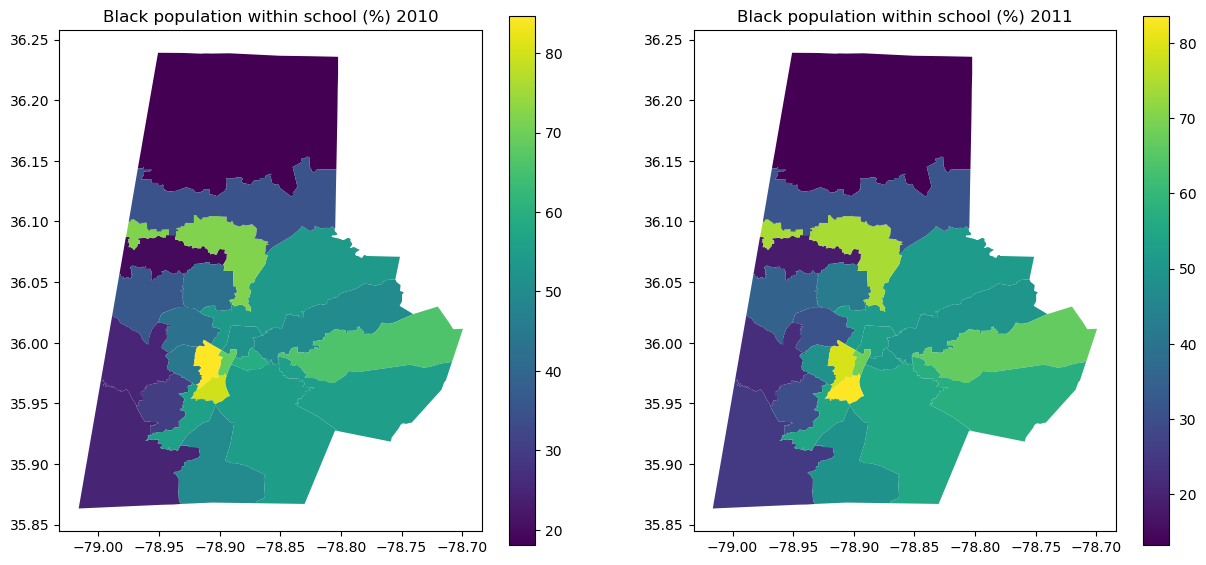

In [17]:
fig, ax  = plt.subplots(1,2, figsize = (15,7), dpi = 100)
processed_dfs["2010"].plot(ax = ax[0], column = "Black %",  legend=True)
ax[0].set_title("Black population within school (%) 2010")
processed_dfs["2011"].plot(ax = ax[1], column = "Black %",  legend=True)
ax[1].set_title("Black population within school (%) 2011")
plt.show()

In [18]:
def plot(title, column_name):
    years = range(2010, 2020)
    fig, ax  = plt.subplots(2,5, figsize = (35,15), dpi = 150)
    i=0 
    j=0
    for index,year in enumerate(years):
        key = str(year)
        texts = []
        df = processed_dfs[key]
        plot = df.plot(ax = ax[i][j], column = column_name,  legend=True)
        ax[i][j].set_title("{} {}".format(title, key))
        df.apply(lambda x: plot.annotate(text = round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 6, color = "red"),axis=1)
        if(index == 4):
            i += 1
            j = 0
        else:
            j+=1

    plt.show()

TypeError: ("annotate() missing 1 required positional argument: 's'", 'occurred at index 0')

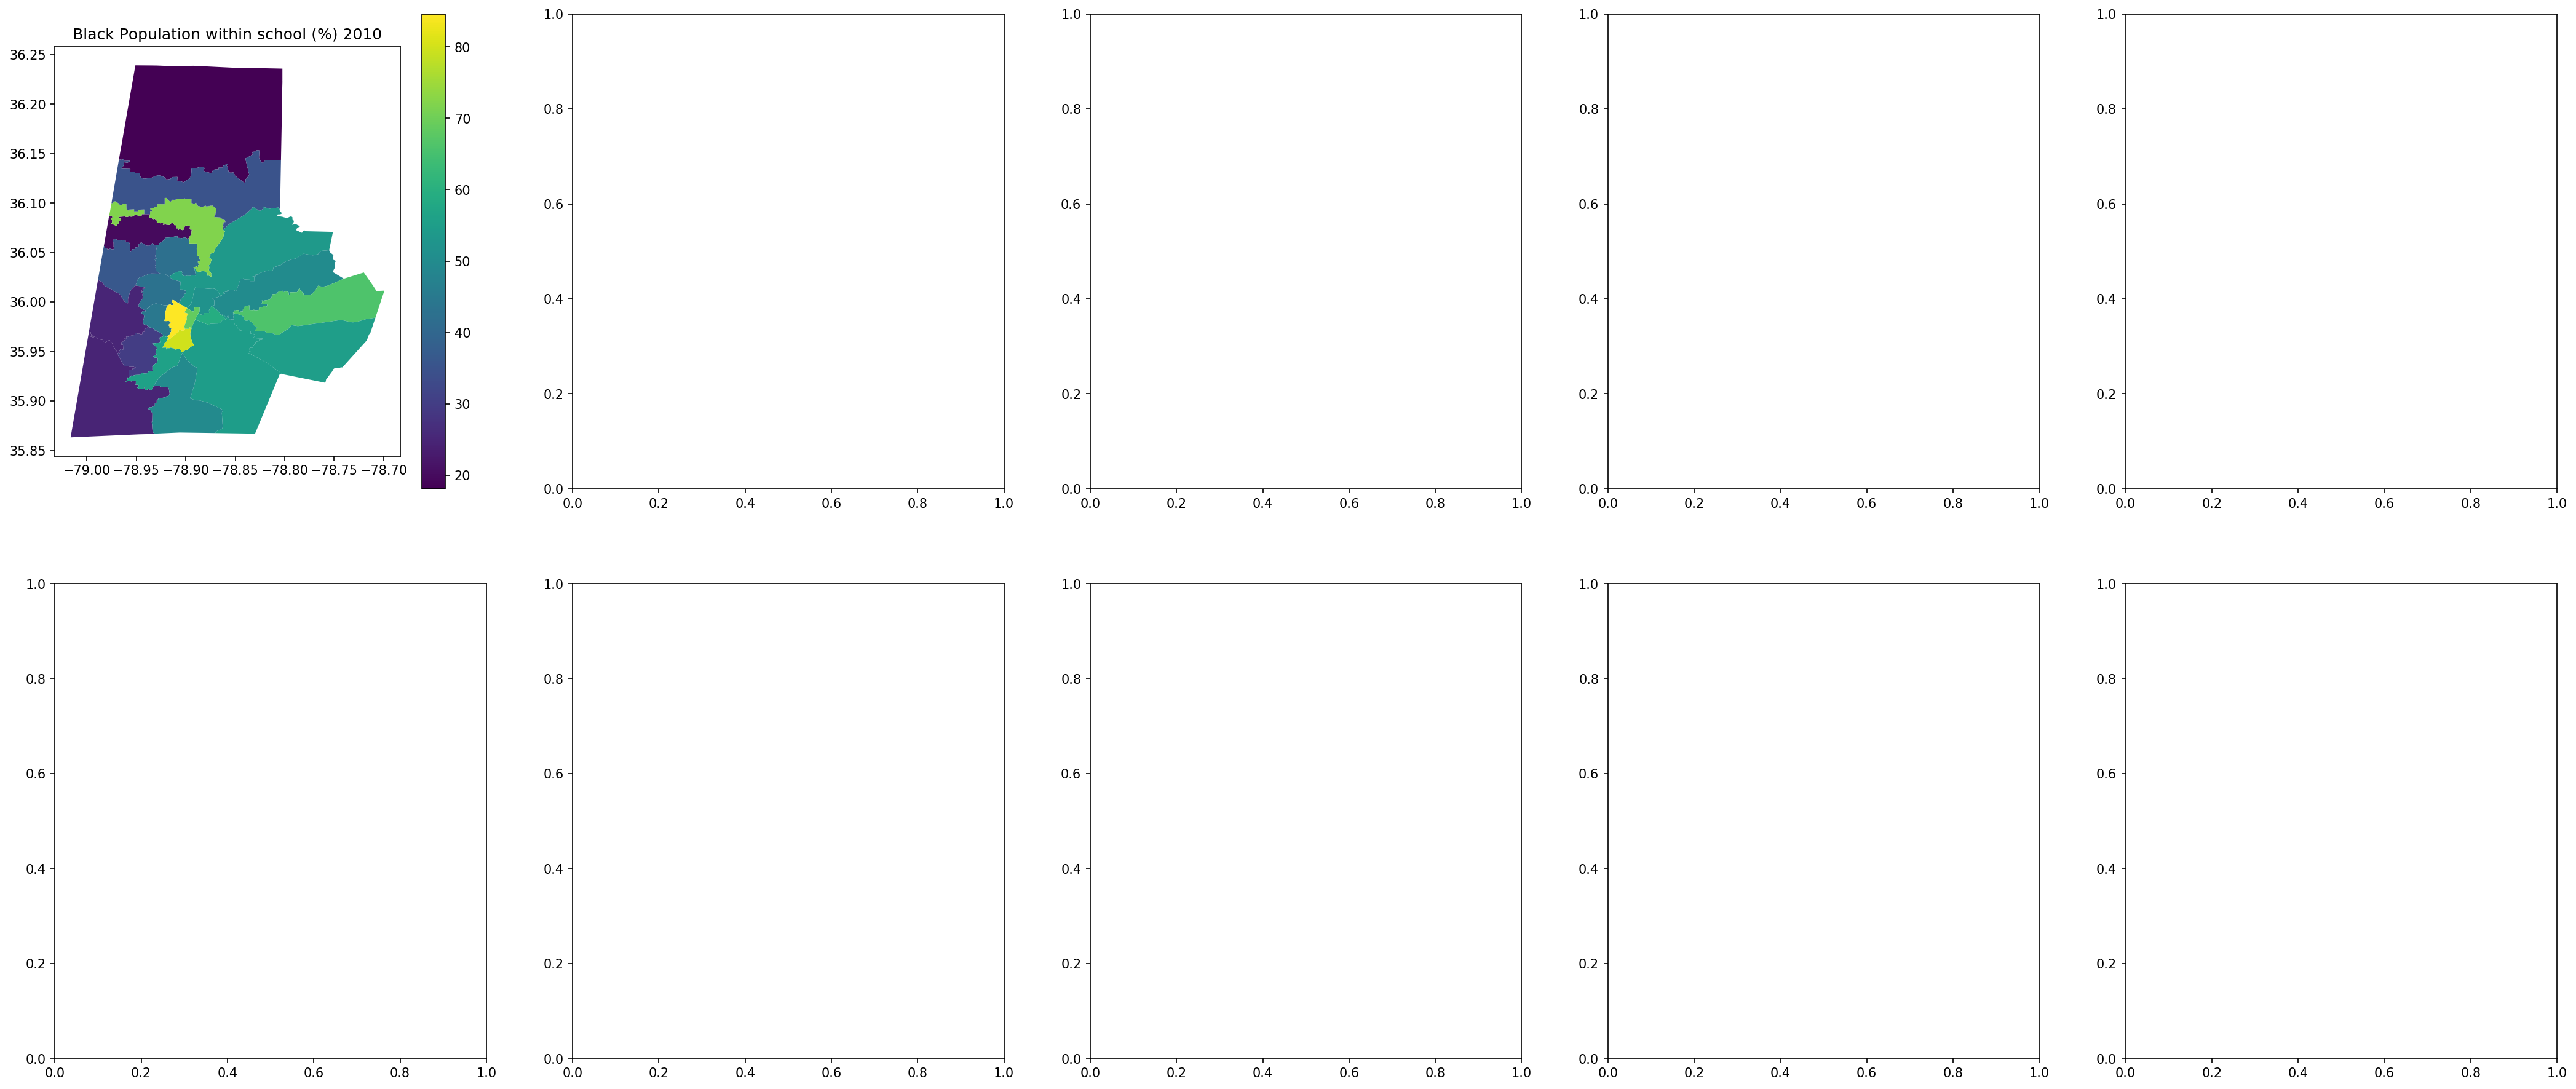

In [19]:
plot("Black Population within school (%)", "Black %")

In [ ]:
plot("White Population within school (%)", "White %")

In [ ]:
plot("Hispanic Population within school (%)", "Hispanic %")

In [ ]:
plot("Black Population in school", "Black Total")

In [ ]:
plot("White Population in school", "White Total")

In [24]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [25]:
def make_plot(year, column_name):
    plt.rcParams["figure.figsize"] = (40,10)
    key = str(year)
    df = processed_dfs[key]
    if(column_name[-1] == "%"):
        plot = df.plot(column = column_name,  legend=True, vmin = 0, vmax = 100)
    else:
        plot = df.plot(column = column_name,  legend=True)
    df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = plot, vmin = 0, vmax = 100)
    df.apply(lambda x: plot.annotate(text = round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
    plt.title("{} Population within school in {}".format(column_name, key))
    


interactive(children=(IntSlider(value=2014, description='year', max=2019, min=2010), ToggleButtons(description…

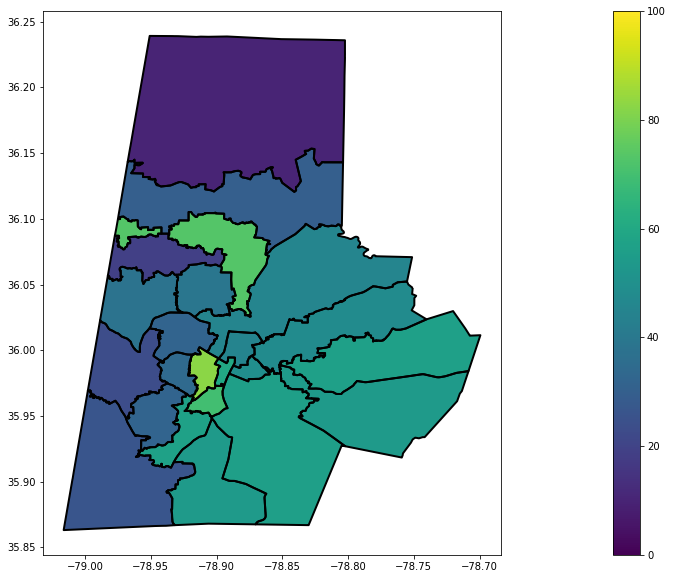

In [26]:
interact(make_plot, year=(2010, 2019, 1), column_name = widgets.ToggleButtons(
    options=['Black %', 'White %', 'Hispanic %', 'Black Total', 'White Total', 'Hispanic Total'],
    description='Population in School:',
))
plt.show()

TypeError: ("annotate() missing 1 required positional argument: 's'", 'occurred at index 0')

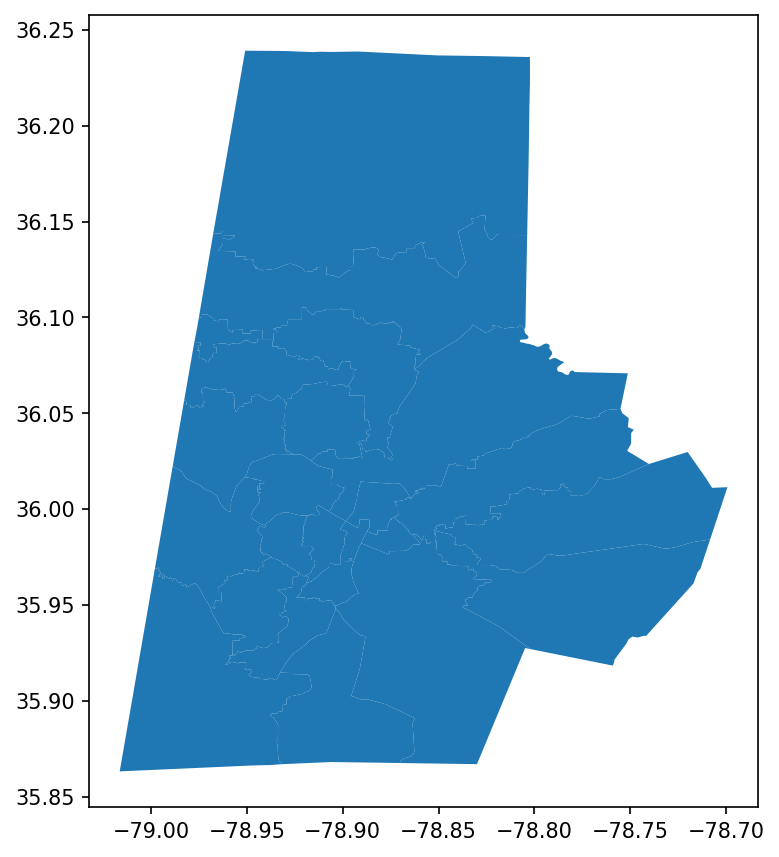

In [27]:
    column_name = "Black %"
    year = 2010
    plt.rcParams["figure.figsize"] = (40,7)
    plt.rcParams["figure.dpi"] = 150
    key = str(year)
    df = processed_dfs[key]
    plot = df.plot()
    
    df.apply(lambda x: plot.annotate(text = x["OBJECTID"], xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
    plt.title("Reference Map - Object ID")
    plt.show()

In [ ]:
processed_dfs["2010"][["OBJECTID", "name", "stateid"]]

### School name, actual bp, actual hp, actual wp, expect bp, expected hp, expected wp

In [ ]:
gif_directory = data_loader.gif_directory()
def gif_maker(column_name, vmin, vmax):
    years = range(2010, 2020)
    for year in years:
        key = str(year)
        df = processed_dfs[key]
        copy_df = df
        fig, ax = plt.subplots(1,1, figsize = (25,25))
        df.plot(ax = ax, legend = True, column = column_name, alpha = 1, vmin = vmin, vmax = vmax)
        df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)
        ax.set_title(column_name+' Actual Population in Elementary School District ({})'.format(year))
        df.apply(lambda x: ax.annotate(s=x[column_name], xy=x.geometry.centroid.coords[0], ha='center', fontsize= 15, color = "red"),axis=1)
        ax.text(-78.75, 36.22, 'Year: ' + key, size=30)
        pict_name = gif_directory+key+" "+column_name+ '.png'
        plt.savefig(pict_name, format = 'png')

In [ ]:
%%capture
gif_maker("Black Total", 0, 500)

In [ ]:
def plot_total_population(column_name):
    total_pops = []
    years = range(2010, 2020)
    for year in years:
        key = str(year)
        df = processed_dfs[key]
        # df.plot(ax = ax, legend = True, column = column_name, alpha = 1, vmin = vmin, vmax= vmax)
        total_black_pop = sum(df[column_name])
        total_pops.append(total_black_pop)
    plt.rcParams["figure.figsize"] = (10,5)
    plt.rcParams["figure.dpi"] = 100
    plt.bar(list(years), total_pops)
    plt.title(column_name+ " Population")
    plt.xlabel("Year")
    plt.xticks(list(years), list(years))
    plt.ylabel("Total Population - all elementary schools")
    


In [ ]:
plot_total_population("Black Total")

In [28]:
plot_total_population("White Total")

NameError: name 'plot_total_population' is not defined

In [29]:
plot_total_population("Hispanic Total")

NameError: name 'plot_total_population' is not defined

In [30]:
plot_total_population("Asian Total")

NameError: name 'plot_total_population' is not defined

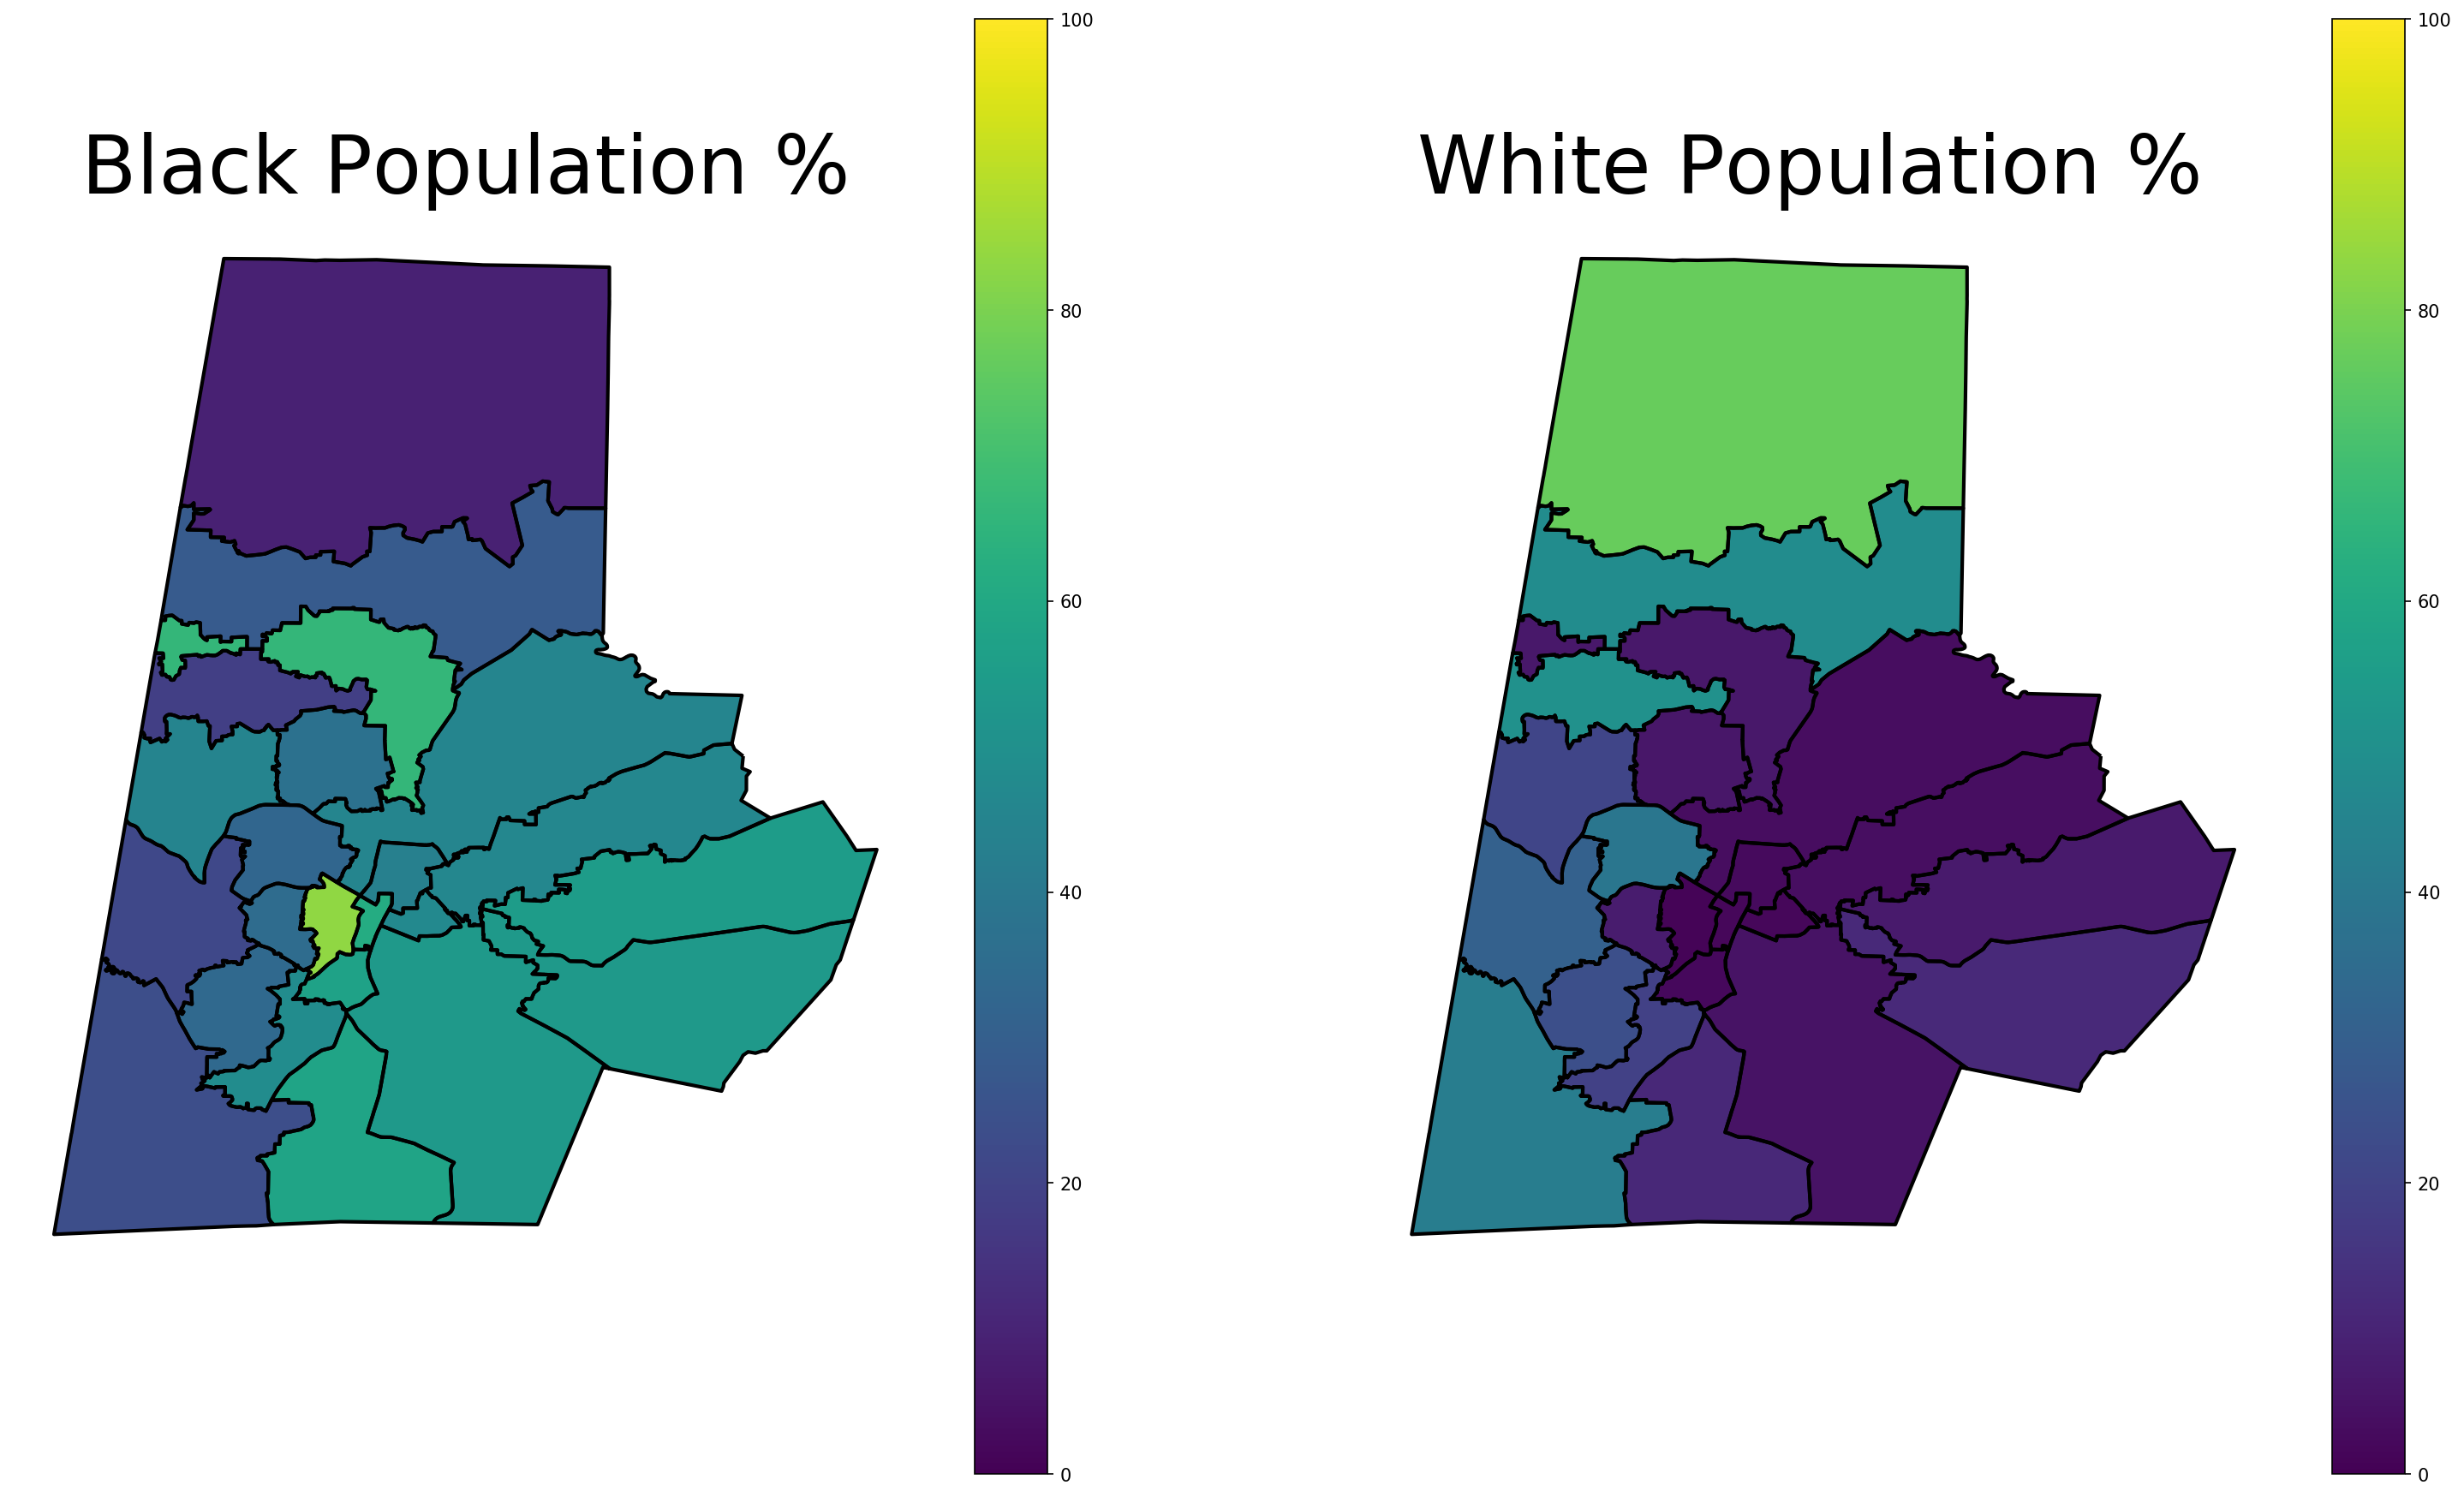

In [31]:
##### Plots to highlight distrubution


fig, ax  = plt.subplots(1,2, figsize = (25,15), dpi = 150)
# plt.rcParams["figure.figsize"] = (40,10)
year = 2018
key = str(year)
df = processed_dfs[key]
column_name = "Black %"
plot = df.plot(column = column_name,  legend=True, vmin = 0, vmax = 100, ax = ax[0])
df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[0], vmin = 0, vmax = 100)
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[0].set_title("Black Population %",fontsize = 45)
ax[0].set_axis_off()

# ax[0].set_axis_off()
# column_name = "Hispanic %"
# plot = df.plot(column = column_name,  legend=True, vmin = 0, vmax = 100, ax = ax[1])
# df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[1], vmin = 0, vmax = 100)
# # df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
# ax[1].set_title("Hispanic Population %",fontsize = 22)
# ax[1].set_axis_off()
# plt.show()
column_name = "White %"
plot = df.plot(column = column_name,  legend=True, vmin = 0, vmax = 100, ax = ax[1])
df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[1], vmin = 0, vmax = 100)
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[1].set_title("White Population % ",fontsize = 45)
ax[1].set_axis_off()
plt.savefig("1.png")

# cbar = plt.colorbar()
# for t in cbar.ax.get_yticklabels():
#      t.set_fontsize(20)
plt.show()




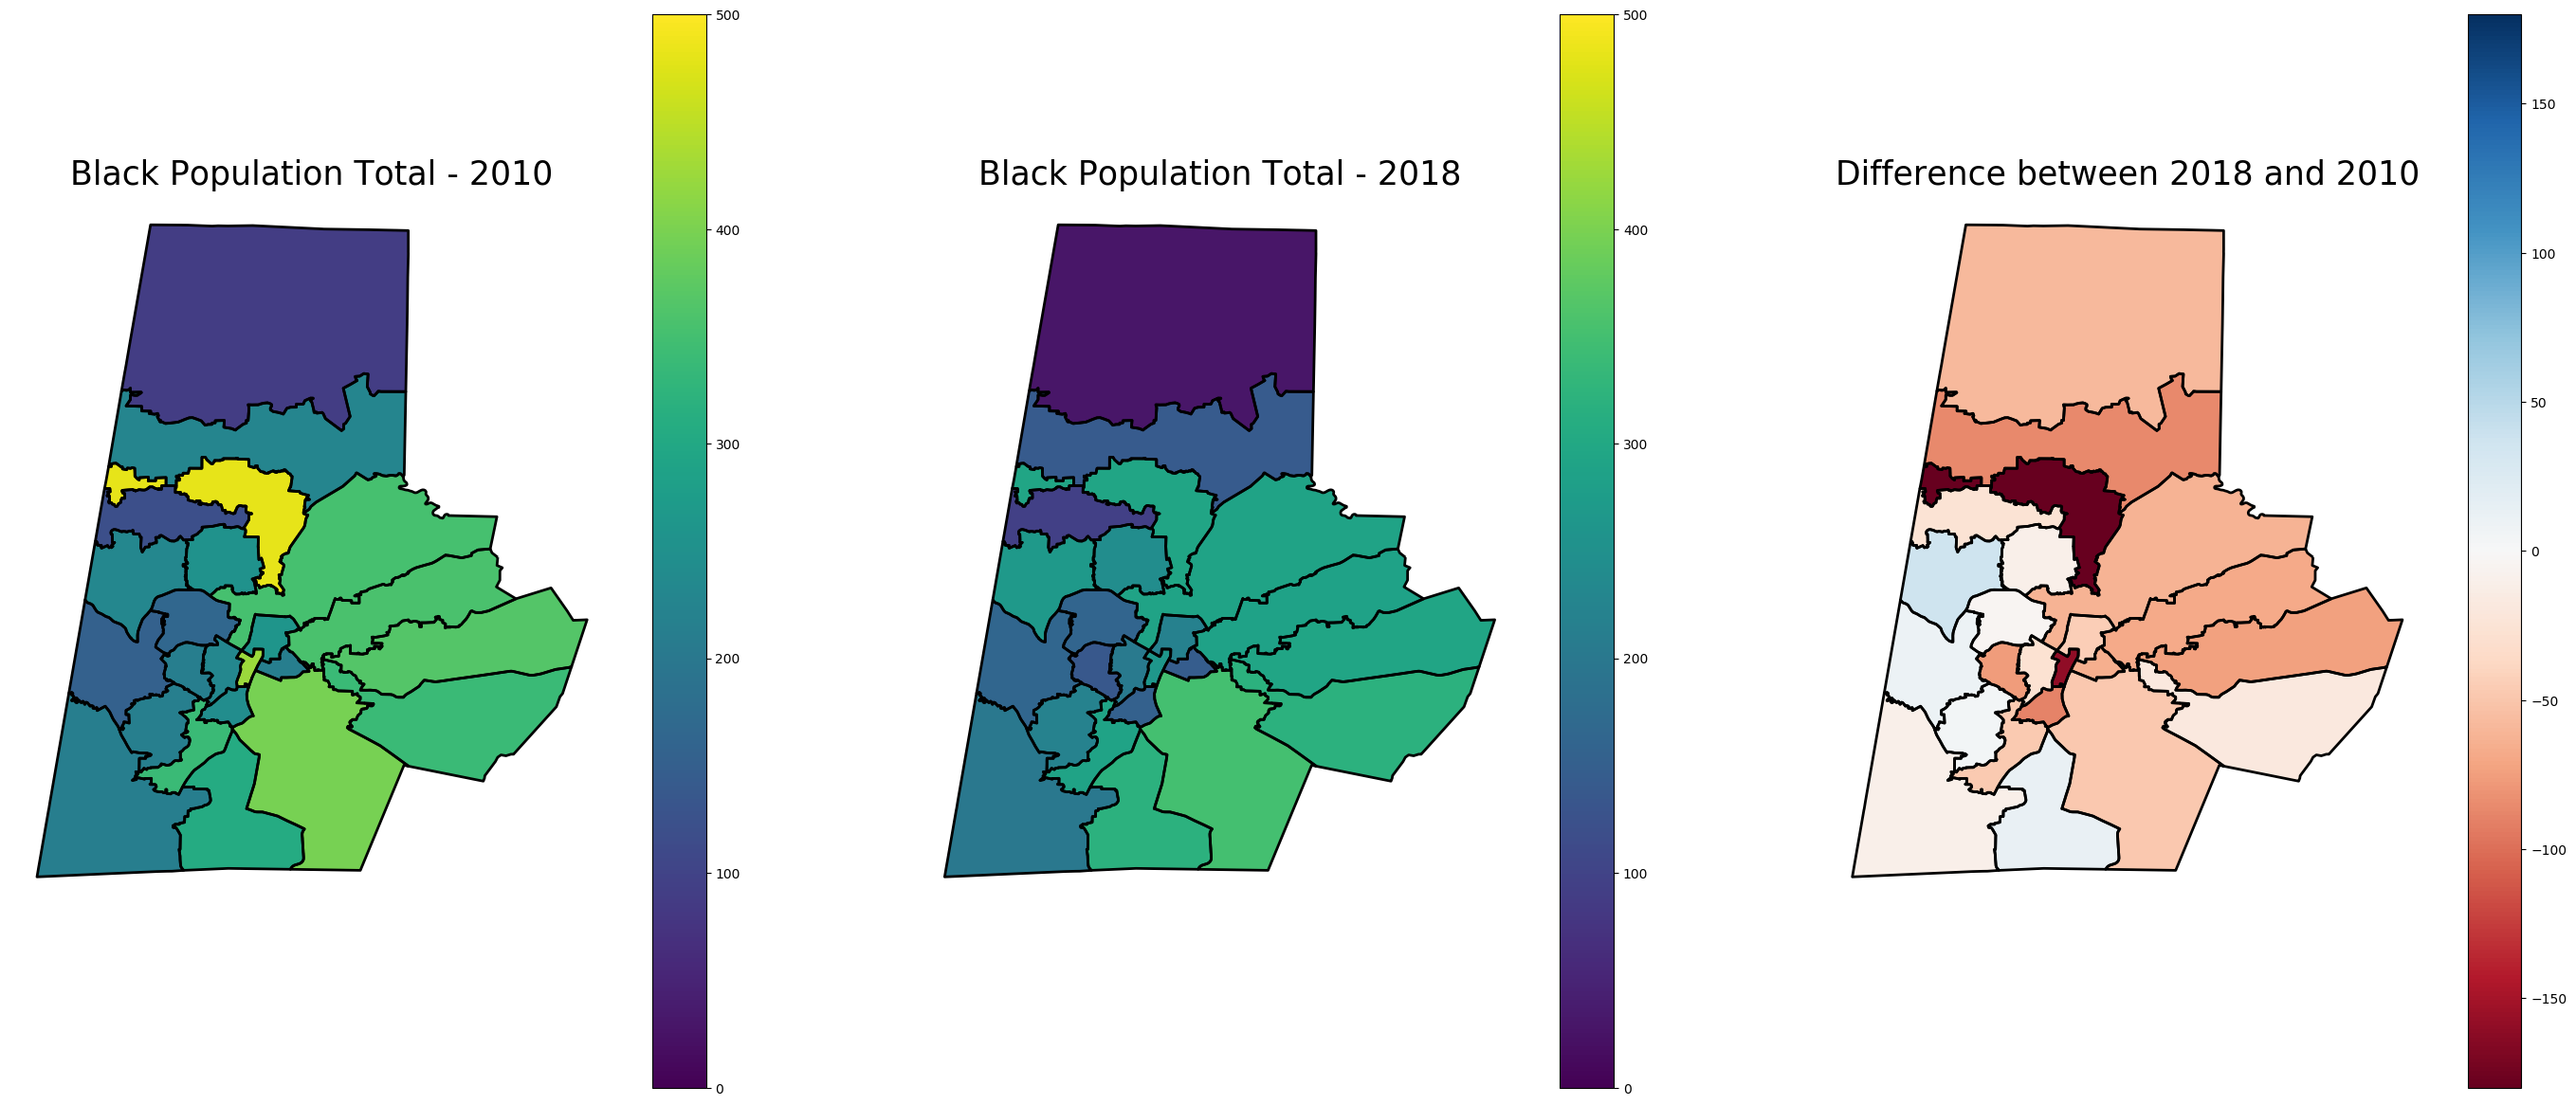

In [32]:
##### Plots to highlight distrubution

# params = {'legend.fontsize': 2000}
# plt.rcParams.update(params)
fig, ax  = plt.subplots(1,3, figsize = (35,15), dpi = 100)

# plt.rcParams["figure.figsize"] = (40,10)
year = 2010
key = str(year)
df = processed_dfs[key]

df = df[['stateid', 'Black Total']]

year = 2018
key = str(year)
new_df = processed_dfs[key]
new_df = new_df.merge(df, how = "inner", on = "stateid")
new_df["Black population change"] = ((new_df["Black Total_x"] - new_df["Black Total_y"]))


# column_name = "Black Population Total 2010"
plot = new_df.plot(column = "Black Total_y",  legend=True, ax = ax[0], vmin = 0, vmax = 500)
new_df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[0])
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[0].tick_params(axis='y', which='major', labelsize=10)
ax[0].set_title("Black Population Total - 2010",fontsize = 25)
ax[0].set_axis_off()


plot = new_df.plot(column = "Black Total_x",  legend=True, ax = ax[1], vmin = 0, vmax = 500)
new_df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[1])
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[1].set_title("Black Population Total - 2018",fontsize = 25)
ax[1].set_axis_off()


plot = new_df.plot(column = "Black population change",  legend=True, ax = ax[2],vmin = -180, vmax = 180, cmap = 'RdBu')
new_df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[2])
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[2].set_title("Difference between 2018 and 2010",fontsize = 25)
ax[2].set_axis_off()

# year = 2011
# key = str(year)
# df = processed_dfs[key]
# column_name = "Black %"
# plot = df.plot(column = column_name,  legend=True, vmin = 0, vmax = 100, ax = ax[1])
# df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[1], vmin = 0, vmax = 100)
# # df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
# ax[1].set_title("White Population % in elementary schools - 2018",fontsize = 22)
# ax[1].set_axis_off()
# plt.show()
# cbar = plt.colorbar()
# for t in cbar.ax.get_yticklabels():
#      t.set_fontsize(20)
# ax[0].legend(prop={'size': 6})
# plt.legend(fontsize=20)
# plt.savefig("2.png")




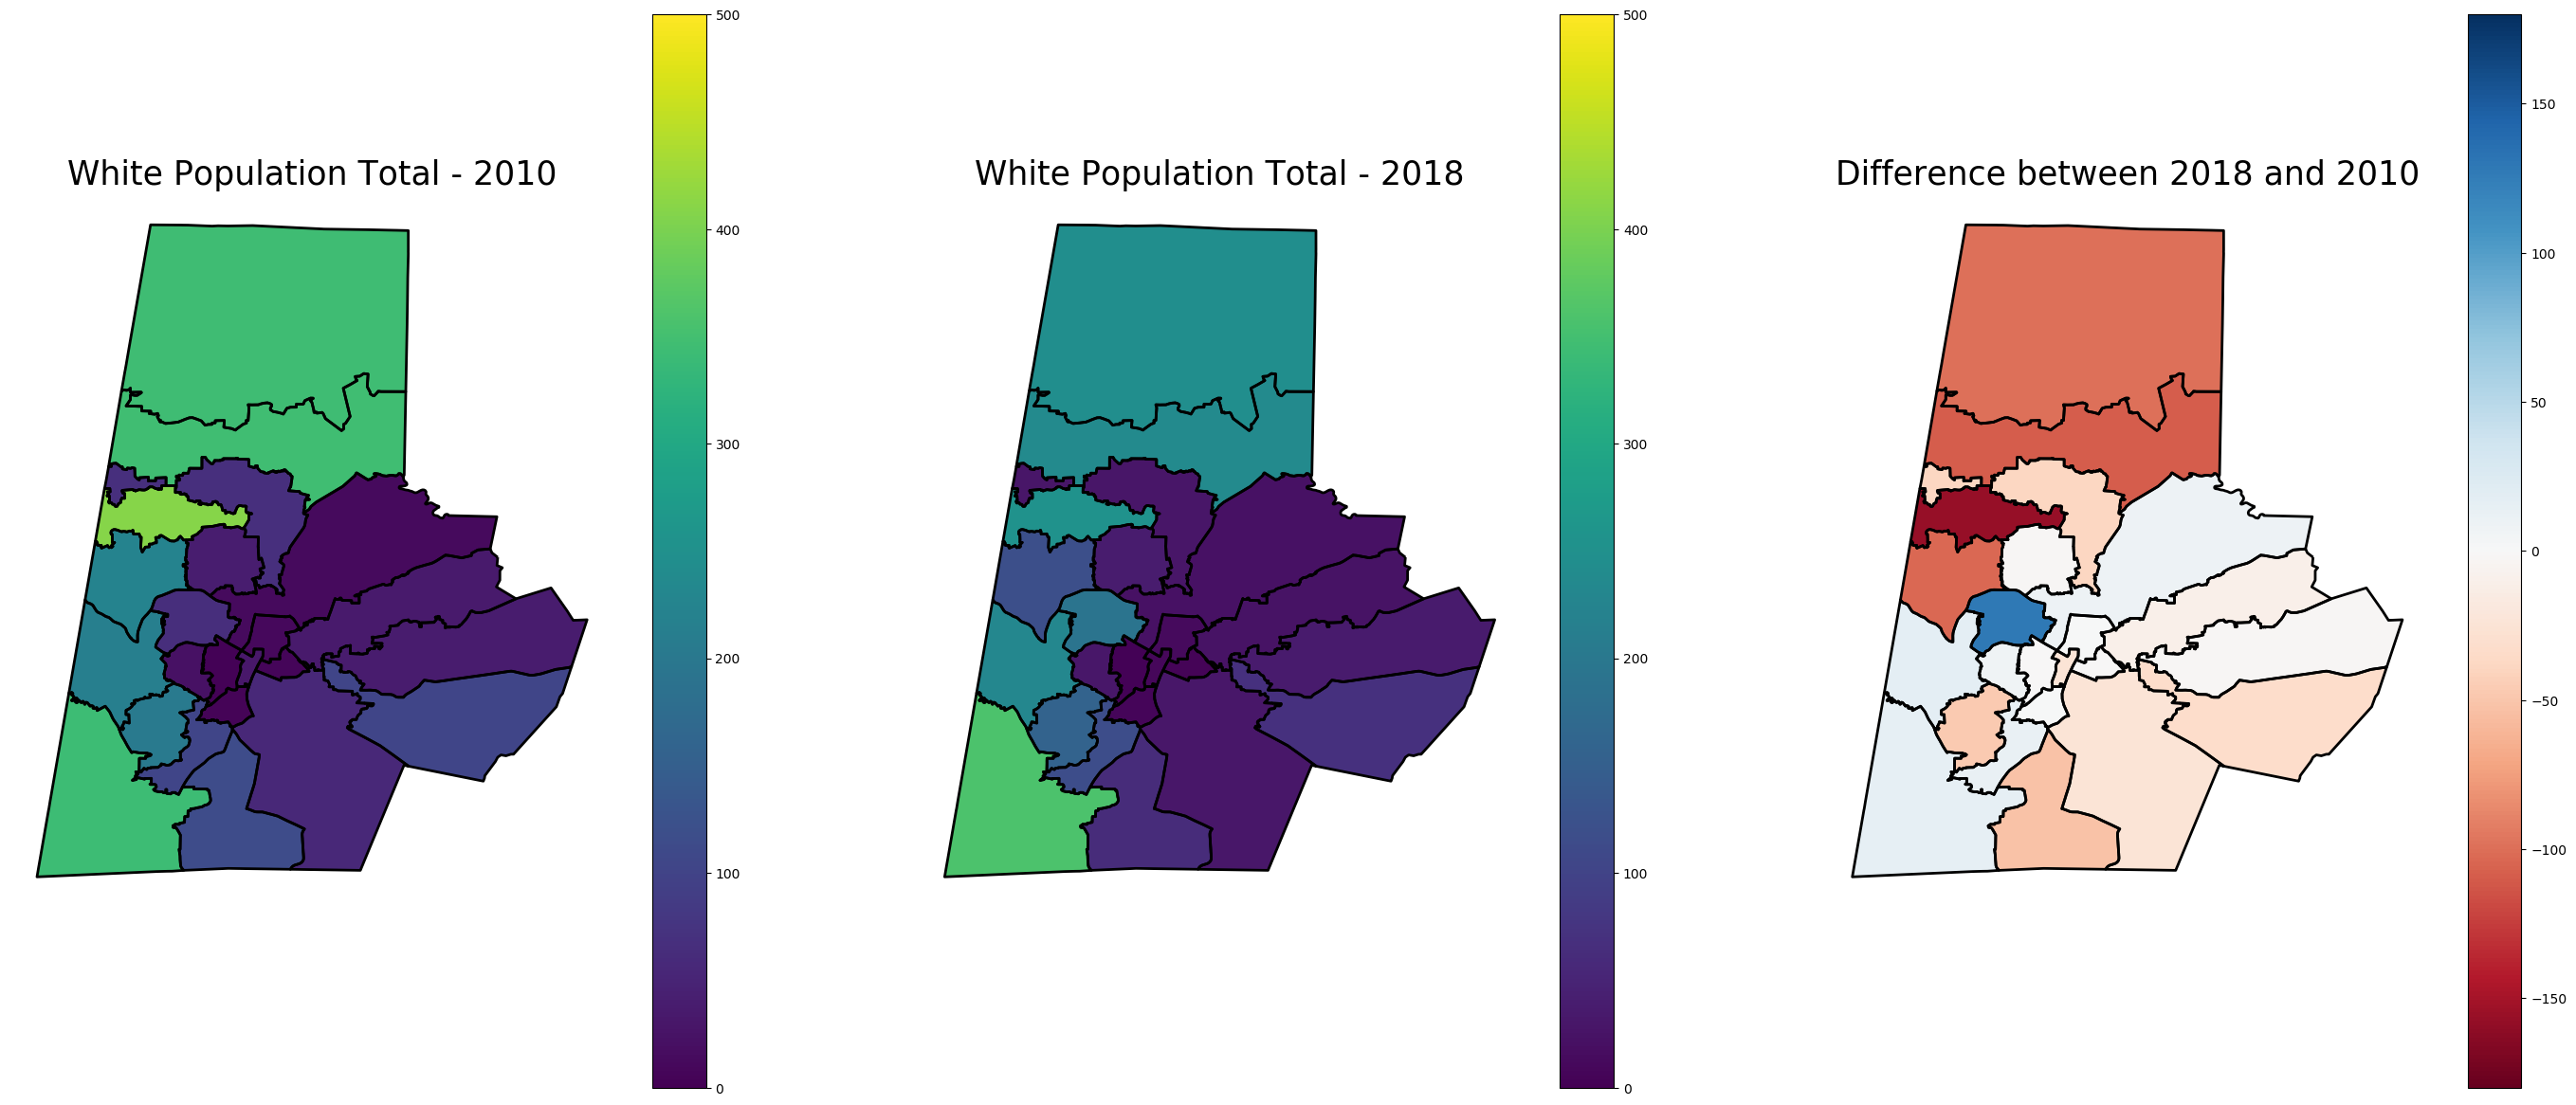

In [33]:
##### Plots to highlight distrubution

# params = {'legend.fontsize': 2000}
# plt.rcParams.update(params)
fig, ax  = plt.subplots(1,3, figsize = (35,15), dpi = 100)

# plt.rcParams["figure.figsize"] = (40,10)
year = 2010
key = str(year)
df = processed_dfs[key]

df = df[['stateid', 'White Total']]

year = 2018
key = str(year)
new_df = processed_dfs[key]
new_df = new_df.merge(df, how = "inner", on = "stateid")
new_df["White population change"] = ((new_df["White Total_x"] - new_df["White Total_y"]))


# column_name = "Black Population Total 2010"
plot = new_df.plot(column = "White Total_y",  legend=True, ax = ax[0], vmin = 0, vmax = 500)
new_df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[0])
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[0].tick_params(axis='y', which='major', labelsize=10)
ax[0].set_title("White Population Total - 2010",fontsize = 25)
ax[0].set_axis_off()


plot = new_df.plot(column = "White Total_x",  legend=True, ax = ax[1], vmin = 0, vmax = 500)
new_df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[1])
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[1].set_title("White Population Total - 2018",fontsize = 25)
ax[1].set_axis_off()


plot = new_df.plot(column = "White population change",  legend=True, ax = ax[2],vmin = -180, vmax = 180, cmap = 'RdBu')
new_df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[2])
# df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
ax[2].set_title("Difference between 2018 and 2010",fontsize = 25)
ax[2].set_axis_off()

# year = 2011
# key = str(year)
# df = processed_dfs[key]
# column_name = "Black %"
# plot = df.plot(column = column_name,  legend=True, vmin = 0, vmax = 100, ax = ax[1])
# df.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax[1], vmin = 0, vmax = 100)
# # df.apply(lambda x: plot.annotate(s=round(x[column_name]), xy=x.geometry.centroid.coords[0], ha='center', fontsize= 9, color = "red"),axis=1)
# ax[1].set_title("White Population % in elementary schools - 2018",fontsize = 22)
# ax[1].set_axis_off()
# plt.show()
# cbar = plt.colorbar()
# for t in cbar.ax.get_yticklabels():
#      t.set_fontsize(20)
# ax[0].legend(prop={'size': 6})
# plt.legend(fontsize=20)
# plt.savefig("3.png")




In [34]:
ngh2018 = pd.read_csv("neighboorhood2018.csv")
ngh2010 = pd.read_csv("neighboorhood2010.csv")
ngh2010['% white'] = ngh2010['% white']*100
ngh2010['% black'] = ngh2010['% black']*100
ngh2010['% hispanic'] = ngh2010['% hispanic']*100

ngh2018['% white'] = ngh2018['% white']*100
ngh2018['% black'] = ngh2018['% black']*100
ngh2018['% hispanic'] = ngh2018['% hispanic']*100

In [35]:
df2010 = processed_dfs["2010"]
df2018 = processed_dfs["2018"]

In [36]:
jn2010 = df2010.merge(ngh2010, how = "inner", on = "stateid")
jn2018 = df2018.merge(ngh2018, how = "inner", on = "stateid")

In [37]:
jn2010["Black % diff"] = jn2010['% black'] - jn2010['Black %']
jn2018["Black % diff"] = jn2018['% black'] - jn2018['Black %']

jn2010["White % diff"] = jn2010['% white'] - jn2010['White %']
jn2018["White % diff"] = jn2018['% white'] - jn2018['White %']

In [38]:

jn2010.name = jn2010.name.str.rsplit(' ',1).str[0]
jn2018.name = jn2018.name.str.rsplit(' ',1).str[0]

<function matplotlib.pyplot.show(*args, **kw)>

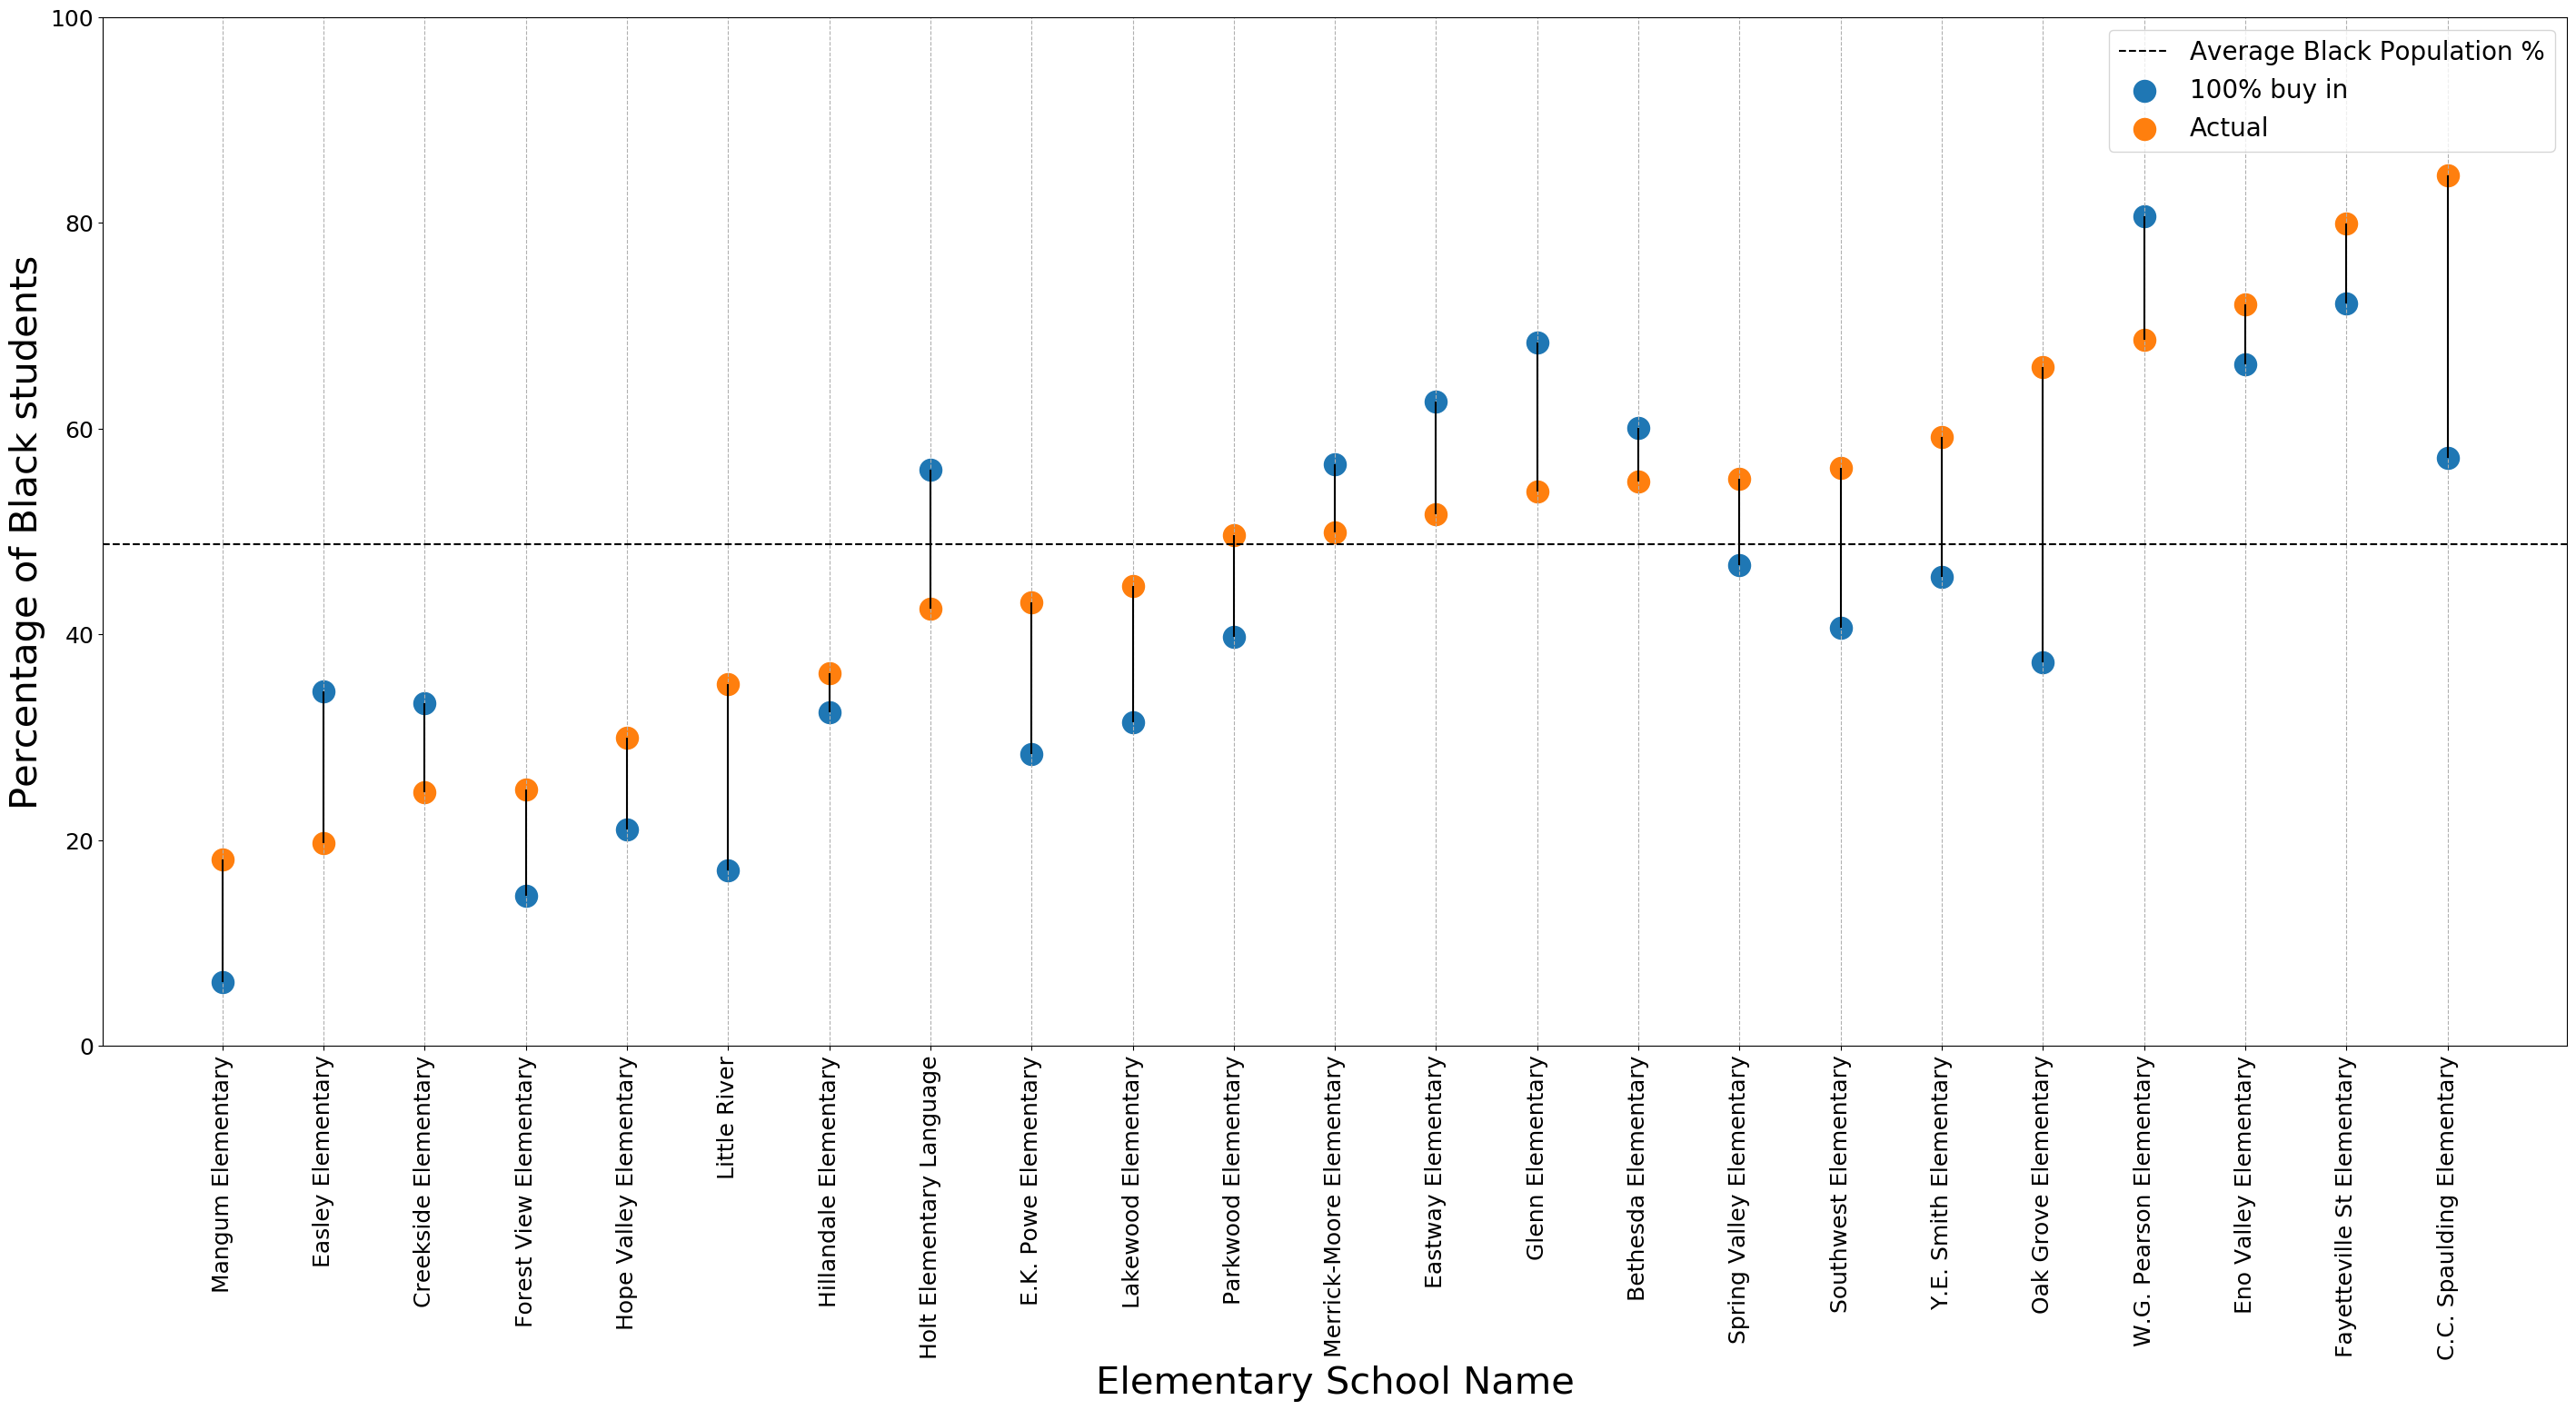

In [39]:
# import matplotlib.ticker.AutoMinorLocator
# plt.hlines(y=my_range, xmin=ordered_df['WAGESPOS'], xmax=ordered_df['LGEPOS'], color='grey', alpha=0.4)
jn2010 = jn2010.sort_values(by='Black %')
fig, ax = plt.subplots(figsize = (35,15), dpi = 100)

ax.scatter(jn2010['name'], jn2010['% black'], marker ='o', alpha=1, label='100% buy in', s = 300)
ax.scatter(jn2010['name'], jn2010['Black %'], marker='o', alpha=1, label='Actual', s = 300)

# plt.vlines(jn2010['name'], 0, 200, colors='k', linestyles='dashed')
# Add title and axis names
# plt.yticks(my_range, ordered_df['SEASON'])
# plt.title("Actual vs. 100% Buy-in black population enrollment - 2010", fontsize = 20)

plt.xlabel('Elementary School Name', fontsize = 30)
plt.ylabel('Percentage of Black students', fontsize = 30)
plt.grid(which="major", linestyle = "dashed", axis = "x")
plt.vlines(x = jn2010['name'], ymin = jn2010['% black'] , ymax = jn2010['Black %'], color = "black")
plt.axhline(y= jn2010['Black %'].mean(), color='black', linestyle='dashed', label = "Average Black Population %")
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# plt.minorticks_on()
plt.xticks(rotation=90, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(ymin=0, ymax = 100)
plt.legend(prop={'size': 20})
# plt.savefig("4.png")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

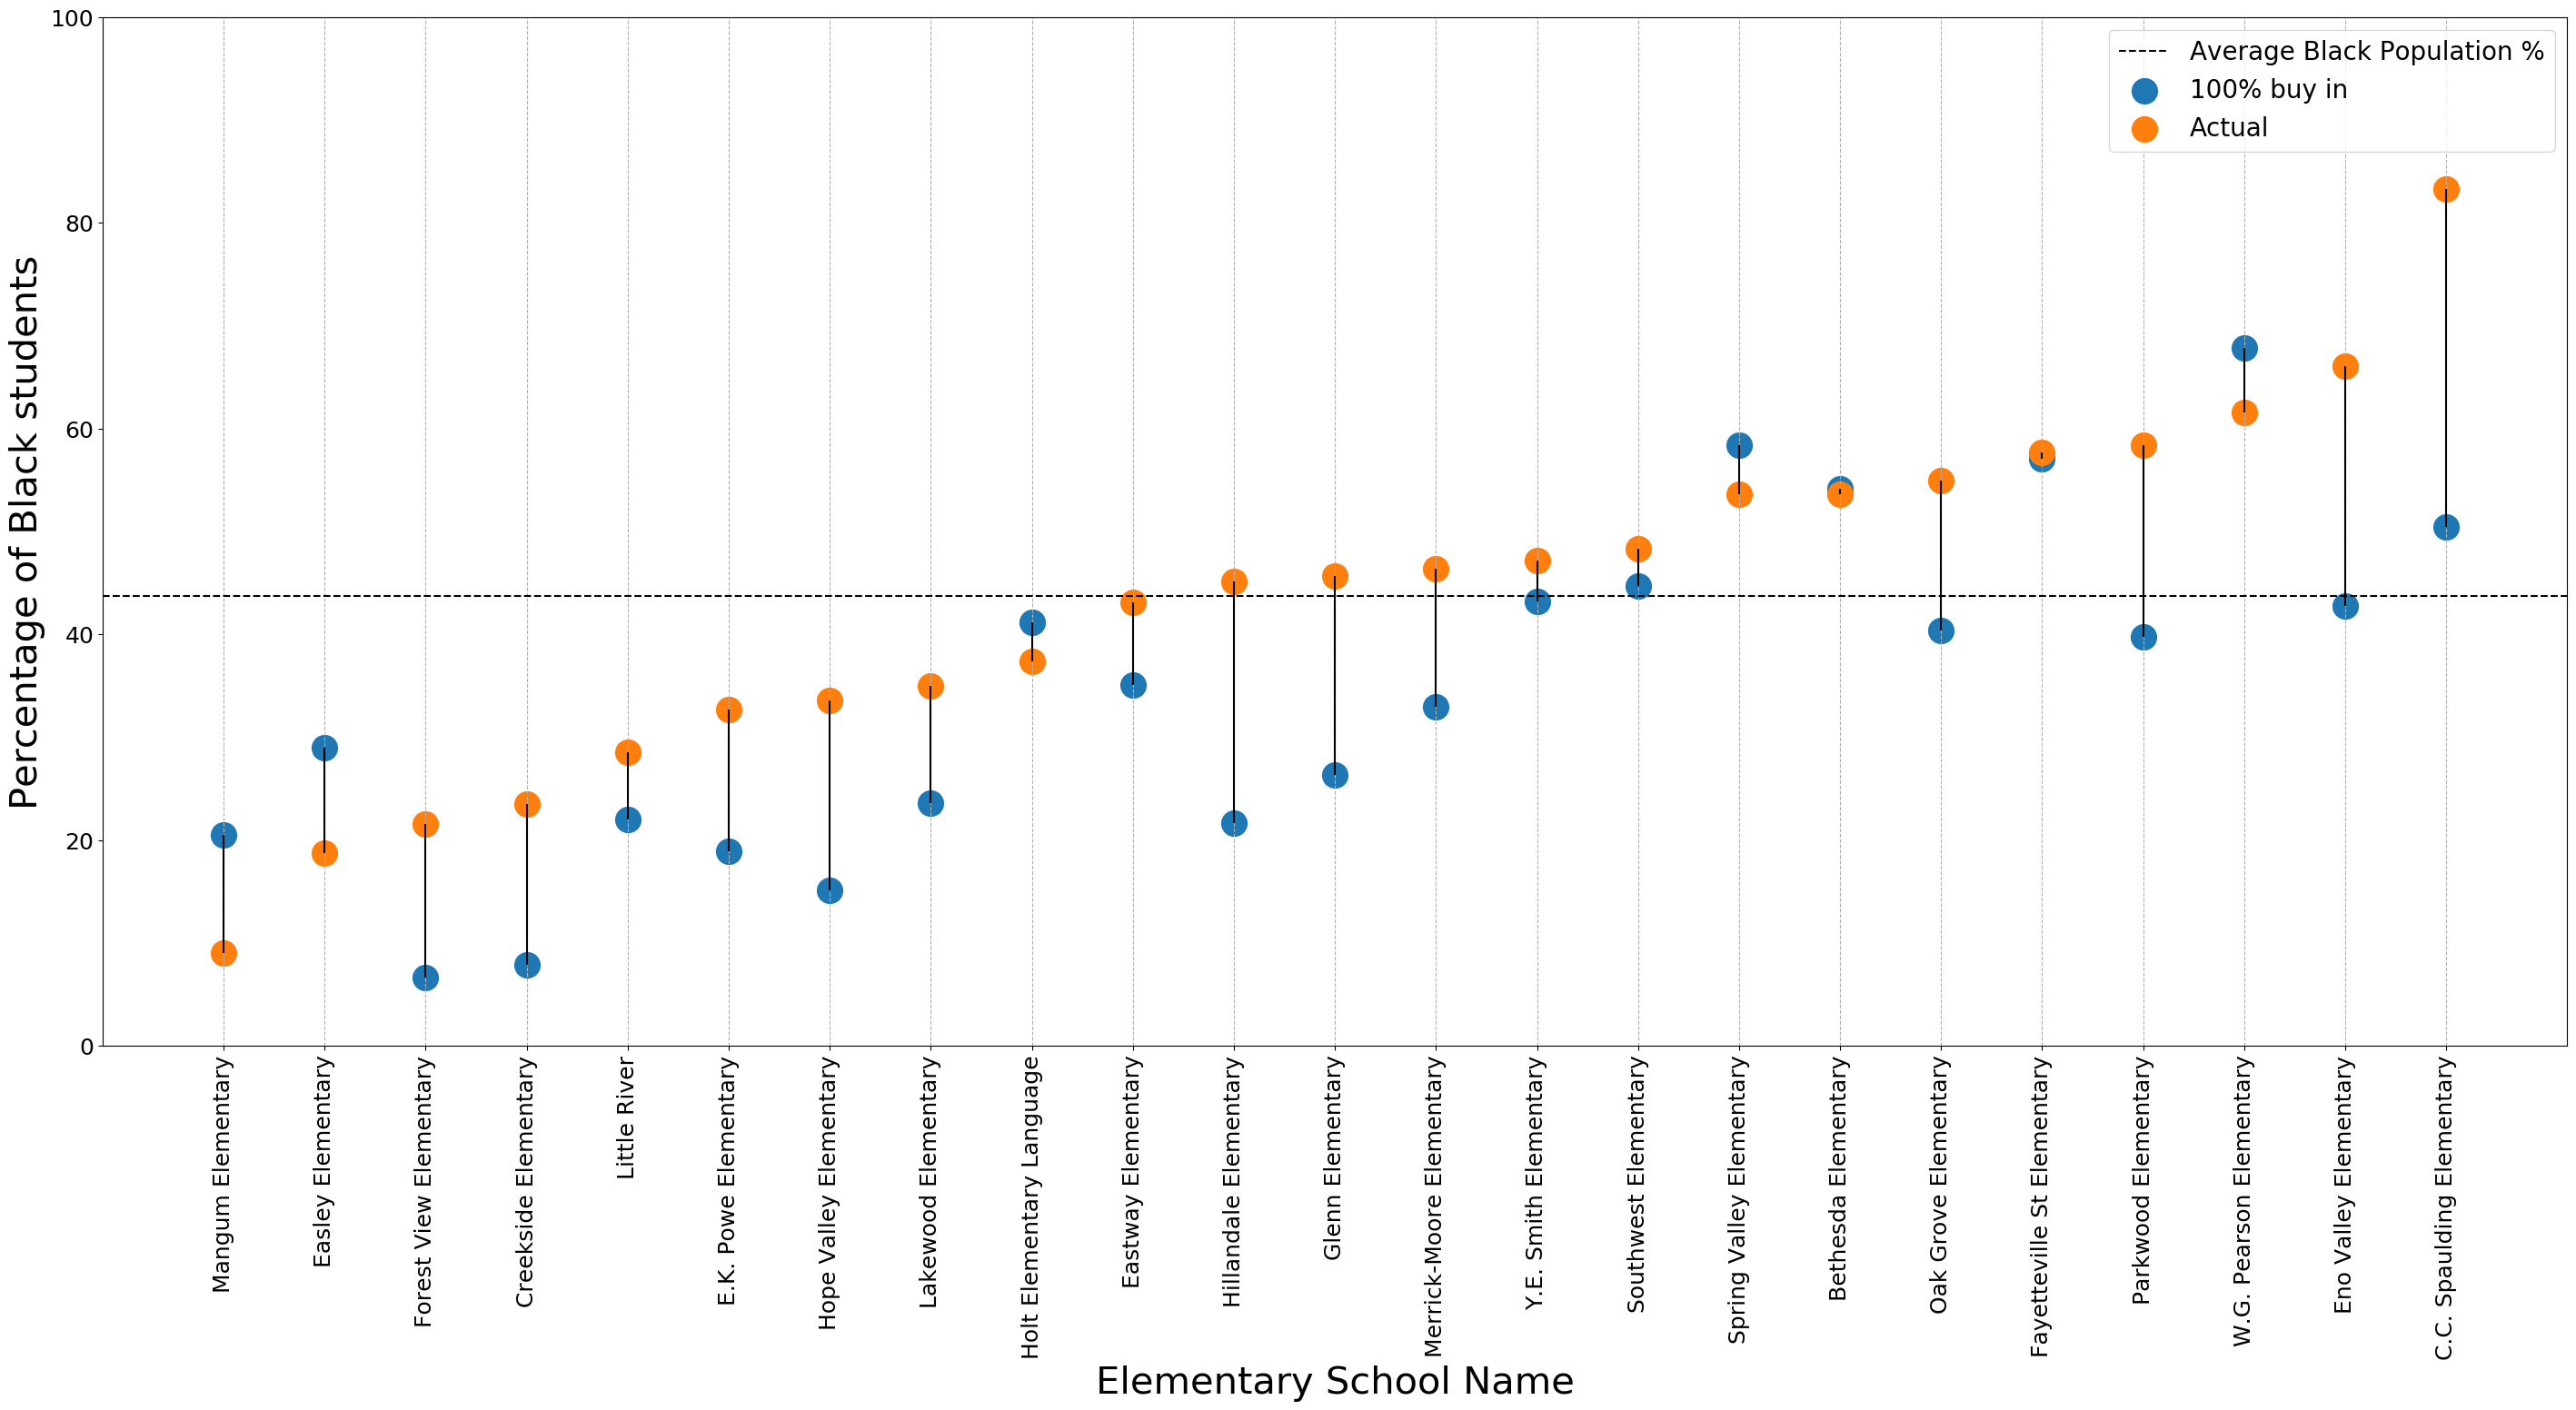

In [40]:
# import matplotlib.ticker.AutoMinorLocator
# plt.hlines(y=my_range, xmin=ordered_df['WAGESPOS'], xmax=ordered_df['LGEPOS'], color='grey', alpha=0.4)
jn2018 = jn2018.sort_values(by='Black %')
fig, ax = plt.subplots(figsize = (35,15), dpi = 100)

ax.scatter(jn2018['name'], jn2018['% black'], marker ='o', alpha=1, label='100% buy in', s = 400)
ax.scatter(jn2018['name'], jn2018['Black %'], marker='o', alpha=1, label='Actual', s = 400)

# plt.vlines(jn2010['name'], 0, 200, colors='k', linestyles='dashed')
# Add title and axis names
# plt.yticks(my_range, ordered_df['SEASON'])
# plt.title("Actual vs. 100% Buy-in black population enrollment - 2018", fontsize = 20)

plt.xlabel('Elementary School Name', fontsize = 30)
plt.ylabel('Percentage of Black students', fontsize = 30)
plt.grid(which="major", linestyle = "dashed", axis='x')
plt.vlines(x = jn2018['name'], ymin = jn2018['% black'] , ymax = jn2018['Black %'], color = "black")
plt.axhline(y= jn2018['Black %'].mean(), color='black', linestyle='dashed', label = "Average Black Population %")
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# plt.minorticks_on()
plt.xticks(rotation=90, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(ymin=0, ymax = 100)
plt.legend(prop={'size': 20})
# plt.savefig("5.png")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

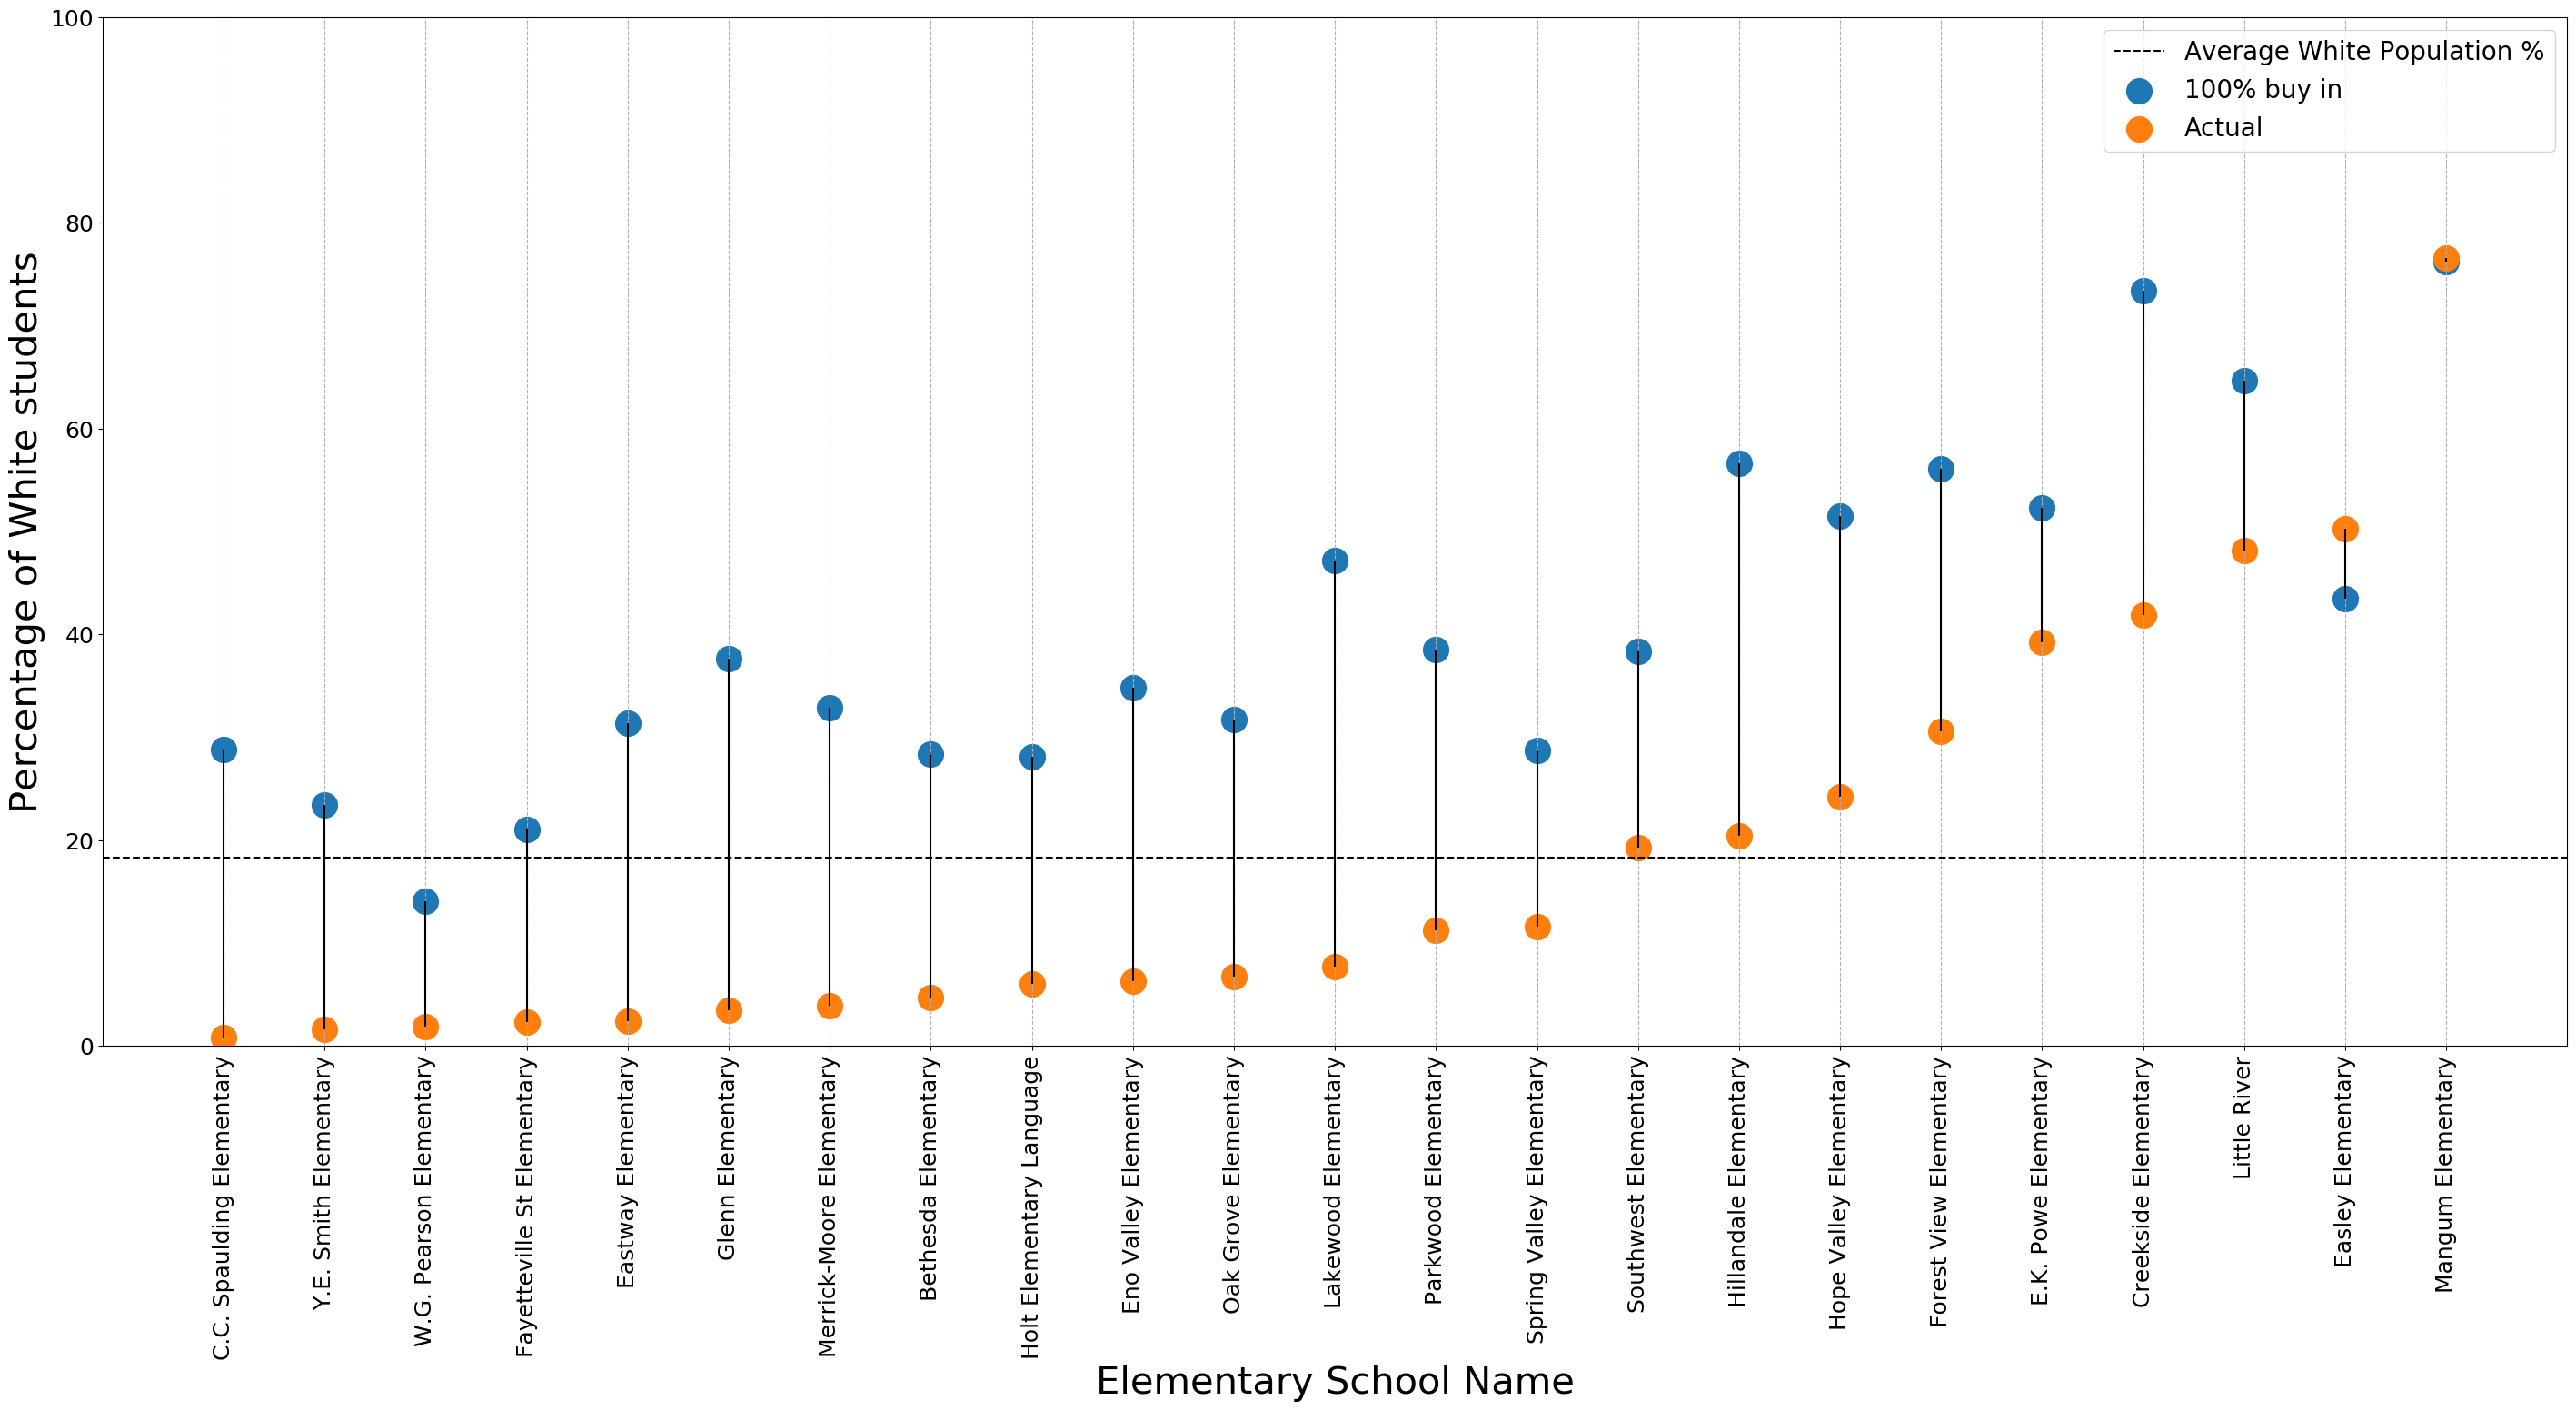

In [41]:
# import matplotlib.ticker.AutoMinorLocator
# plt.hlines(y=my_range, xmin=ordered_df['WAGESPOS'], xmax=ordered_df['LGEPOS'], color='grey', alpha=0.4)
jn2018 = jn2018.sort_values(by='White %')
fig, ax = plt.subplots(figsize = (35,15), dpi = 100)

ax.scatter(jn2018['name'], jn2018['% white'], marker ='o', alpha=1, label='100% buy in', s = 400)
ax.scatter(jn2018['name'], jn2018['White %'], marker='o', alpha=1, label='Actual', s = 400)

# plt.vlines(jn2010['name'], 0, 200, colors='k', linestyles='dashed')
# Add title and axis names
# plt.yticks(my_range, ordered_df['SEASON'])
# plt.title("Actual vs. 100% Buy-in White population enrollment - 2018", fontsize = 20)

plt.xlabel('Elementary School Name', fontsize= 30)
plt.ylabel('Percentage of White students', fontsize= 30)
plt.grid(which="major", linestyle = "dashed", axis = 'x')
plt.vlines(x = jn2018['name'], ymin = jn2018['% white'] , ymax = jn2018['White %'], color = "black")
plt.axhline(y= jn2018['White %'].mean(), color='black', linestyle='dashed', label = "Average White Population %")
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# plt.minorticks_on()
plt.xticks(rotation=90, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(ymin=0, ymax = 100)
plt.legend(prop={'size': 20})
# plt.savefig("6.png")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

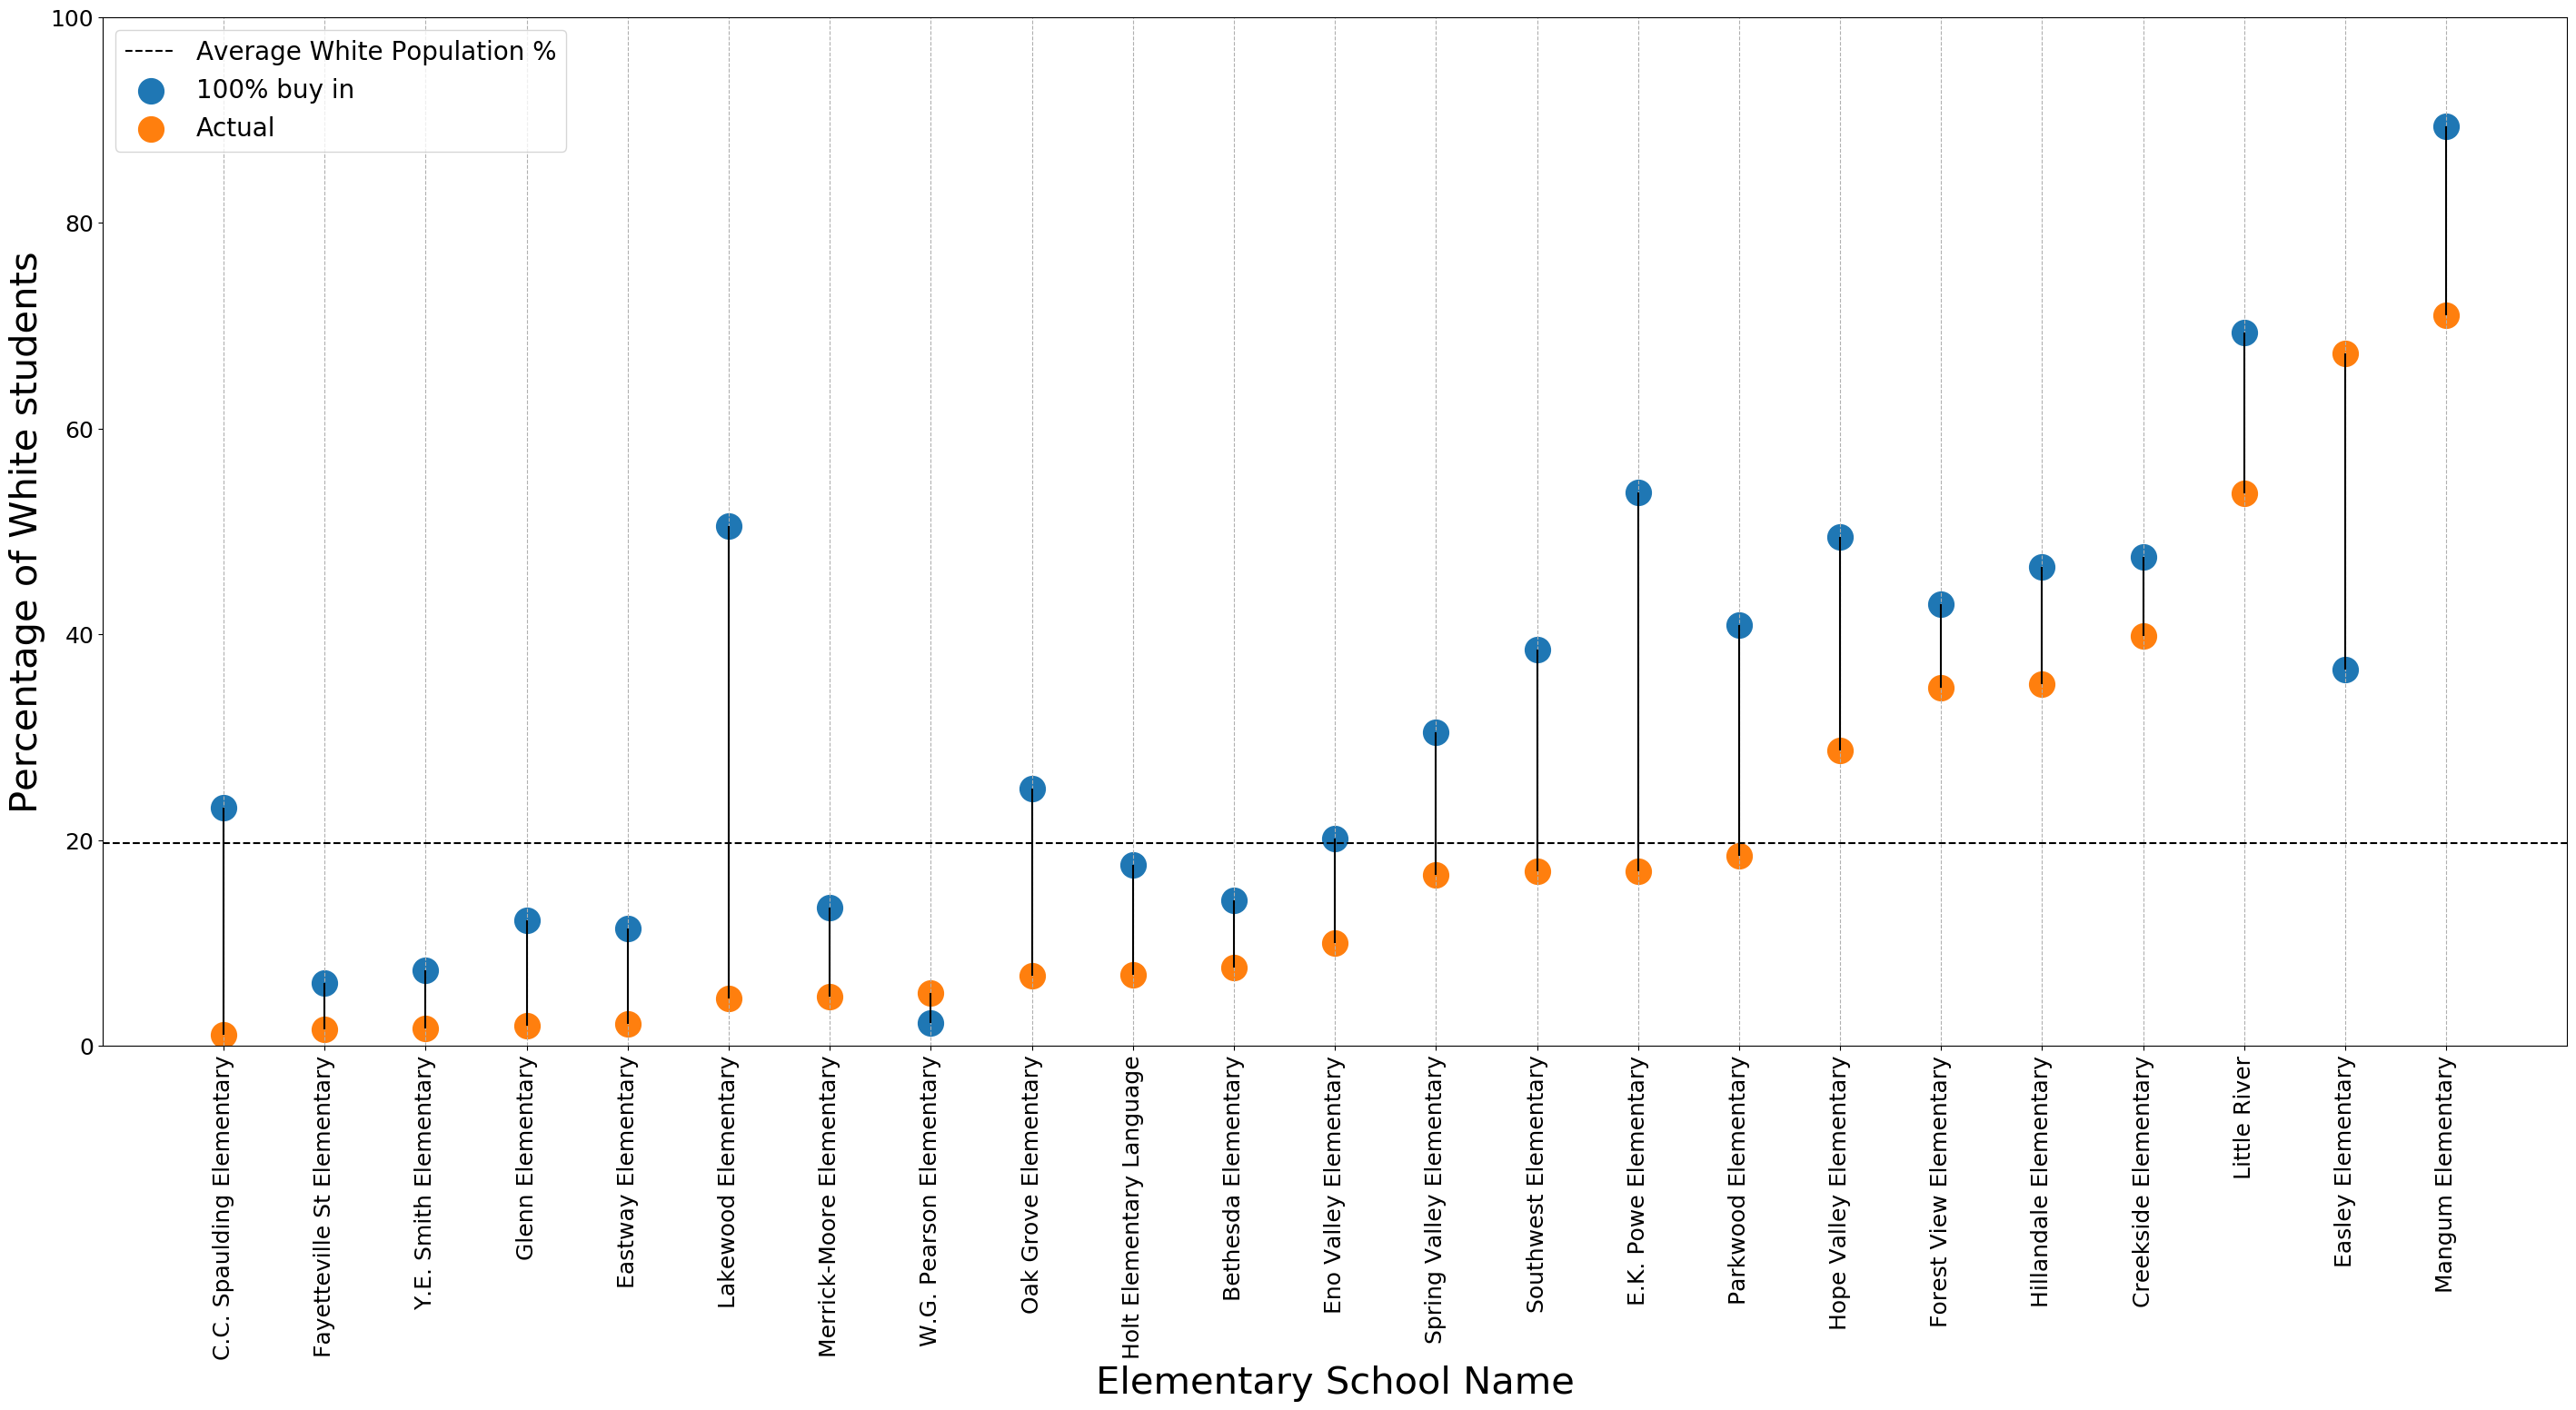

In [42]:
# import matplotlib.ticker.AutoMinorLocator
# plt.hlines(y=my_range, xmin=ordered_df['WAGESPOS'], xmax=ordered_df['LGEPOS'], color='grey', alpha=0.4)
jn2010 = jn2010.sort_values(by='White %')
fig, ax = plt.subplots(figsize = (35,15), dpi = 100)

ax.scatter(jn2010['name'], jn2010['% white'], marker ='o', alpha=1, label='100% buy in', s = 400)
ax.scatter(jn2010['name'], jn2010['White %'], marker='o', alpha=1, label='Actual', s = 400)

# plt.vlines(jn2010['name'], 0, 200, colors='k', linestyles='dashed')
# Add title and axis names
# plt.yticks(my_range, ordered_df['SEASON'])
# plt.title("Actual vs. 100% Buy-in White population enrollment - 2010", fontsize = 20)

plt.xlabel('Elementary School Name', fontsize = 30)
plt.ylabel('Percentage of White students', fontsize = 30)
plt.grid(which="major", linestyle = "dashed", axis = "x")
plt.vlines(x = jn2010['name'], ymin = jn2010['% white'] , ymax = jn2010['White %'], color = "black")
plt.axhline(y= jn2010['White %'].mean(), color='black', linestyle='dashed', label = "Average White Population %")
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# plt.minorticks_on()
plt.xticks(rotation=90, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(ymin=0, ymax = 100)
plt.legend(prop={'size': 20})
# plt.savefig("5_5.png")
plt.show


In [43]:
### Timeline
expected_distribution = pd.read_csv("neighborhood2010-2018.csv")
expected_distribution['% white'] = expected_distribution['% white']*100
expected_distribution['% black'] = expected_distribution['% black']*100
expected_distribution['% hispanic'] = expected_distribution['% hispanic']*100

In [44]:
def make_plot(year):
    # ngh2018 = pd.read_csv("neighboorhood2018.csv")
    # ngh2010 = pd.read_csv("neighboorhood2010.csv")
    key = str(year)
    actual_df = processed_dfs[key]
    expected_df = expected_distribution[expected_distribution["year"] == year]
    df = actual_df.merge(expected_df, how = "inner", on = "stateid")
    df.name = df.name.str.rsplit(' ',1).str[0]



    df = df.sort_values(by='name')
    fig, ax = plt.subplots(figsize = (35,15), dpi = 100)

    ax.scatter(df['name'], df['% white'], marker ='o', alpha=1, label='100% buy in', s = 300)
    ax.scatter(df['name'], df['White %'], marker='o', alpha=1, label='Actual', s = 300)

    plt.xlabel('Elementary School Name', fontsize = 30)
    plt.ylabel('Percentage of White students', fontsize = 30)
    plt.title("White students - actual vs. 100% buy-in ({})".format(year), fontsize = 30)
    plt.grid(which="major", linestyle = "dashed", axis = "x")
    plt.vlines(x = df['name'], ymin = df['% white'] , ymax = df['White %'], color = "black")
    plt.axhline(y= df['White %'].mean(), color='black', linestyle='dashed', label = "Average White Population %")
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# plt.minorticks_on()
    plt.xticks(rotation=90, fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylim(ymin=0, ymax = 100)
    plt.legend(prop={'size': 20})
# plt.savefig("4.png")
    # plt.show



In [45]:
interact(make_plot, year=(2010, 2018, 1))
plt.show()

interactive(children=(IntSlider(value=2014, description='year', max=2018, min=2010), Output()), _dom_classes=(…

In [46]:
processed_dfs["2011"].columns

Index(['OBJECTID', 'facilityid', 'stateid', 'name', 'disttype', 'distarea',
       'CreationDa', 'Creator', 'EditDate', 'Editor', 'ShortName', 'LearnMore',
       'SHAPESTAre', 'SHAPESTLen', 'geometry', 'Schools', 'Site Code',
       'American Indian M', 'American Indian F', 'Hawaiian Pacific M',
       'Hawaiian Pacific F', 'Asian M', 'Asian F', 'Hispanic M', 'Hispanic F',
       'Black M', 'Black F', 'White M', 'White F', 'Multi Racial M',
       'Multi Racial F', 'Totals Male', 'Totals Female', 'Totals All',
       'White Total', 'White %', 'Asian Total', 'Asian %', 'Black Total',
       'Black %', 'Hispanic Total', 'Hispanic %', 'Multi Racial Total',
       'Multi Racial %', 'Hawaiian Pacific Total', 'Hawaiian Pacific %',
       'American Indian Total', 'American Indian %'],
      dtype='object')

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
actual_df = processed_dfs['2010']

In [49]:
expected_df = expected_distribution[expected_distribution["year"] == 2010]

In [50]:
df = actual_df.merge(expected_df, how = "inner", on = "stateid")

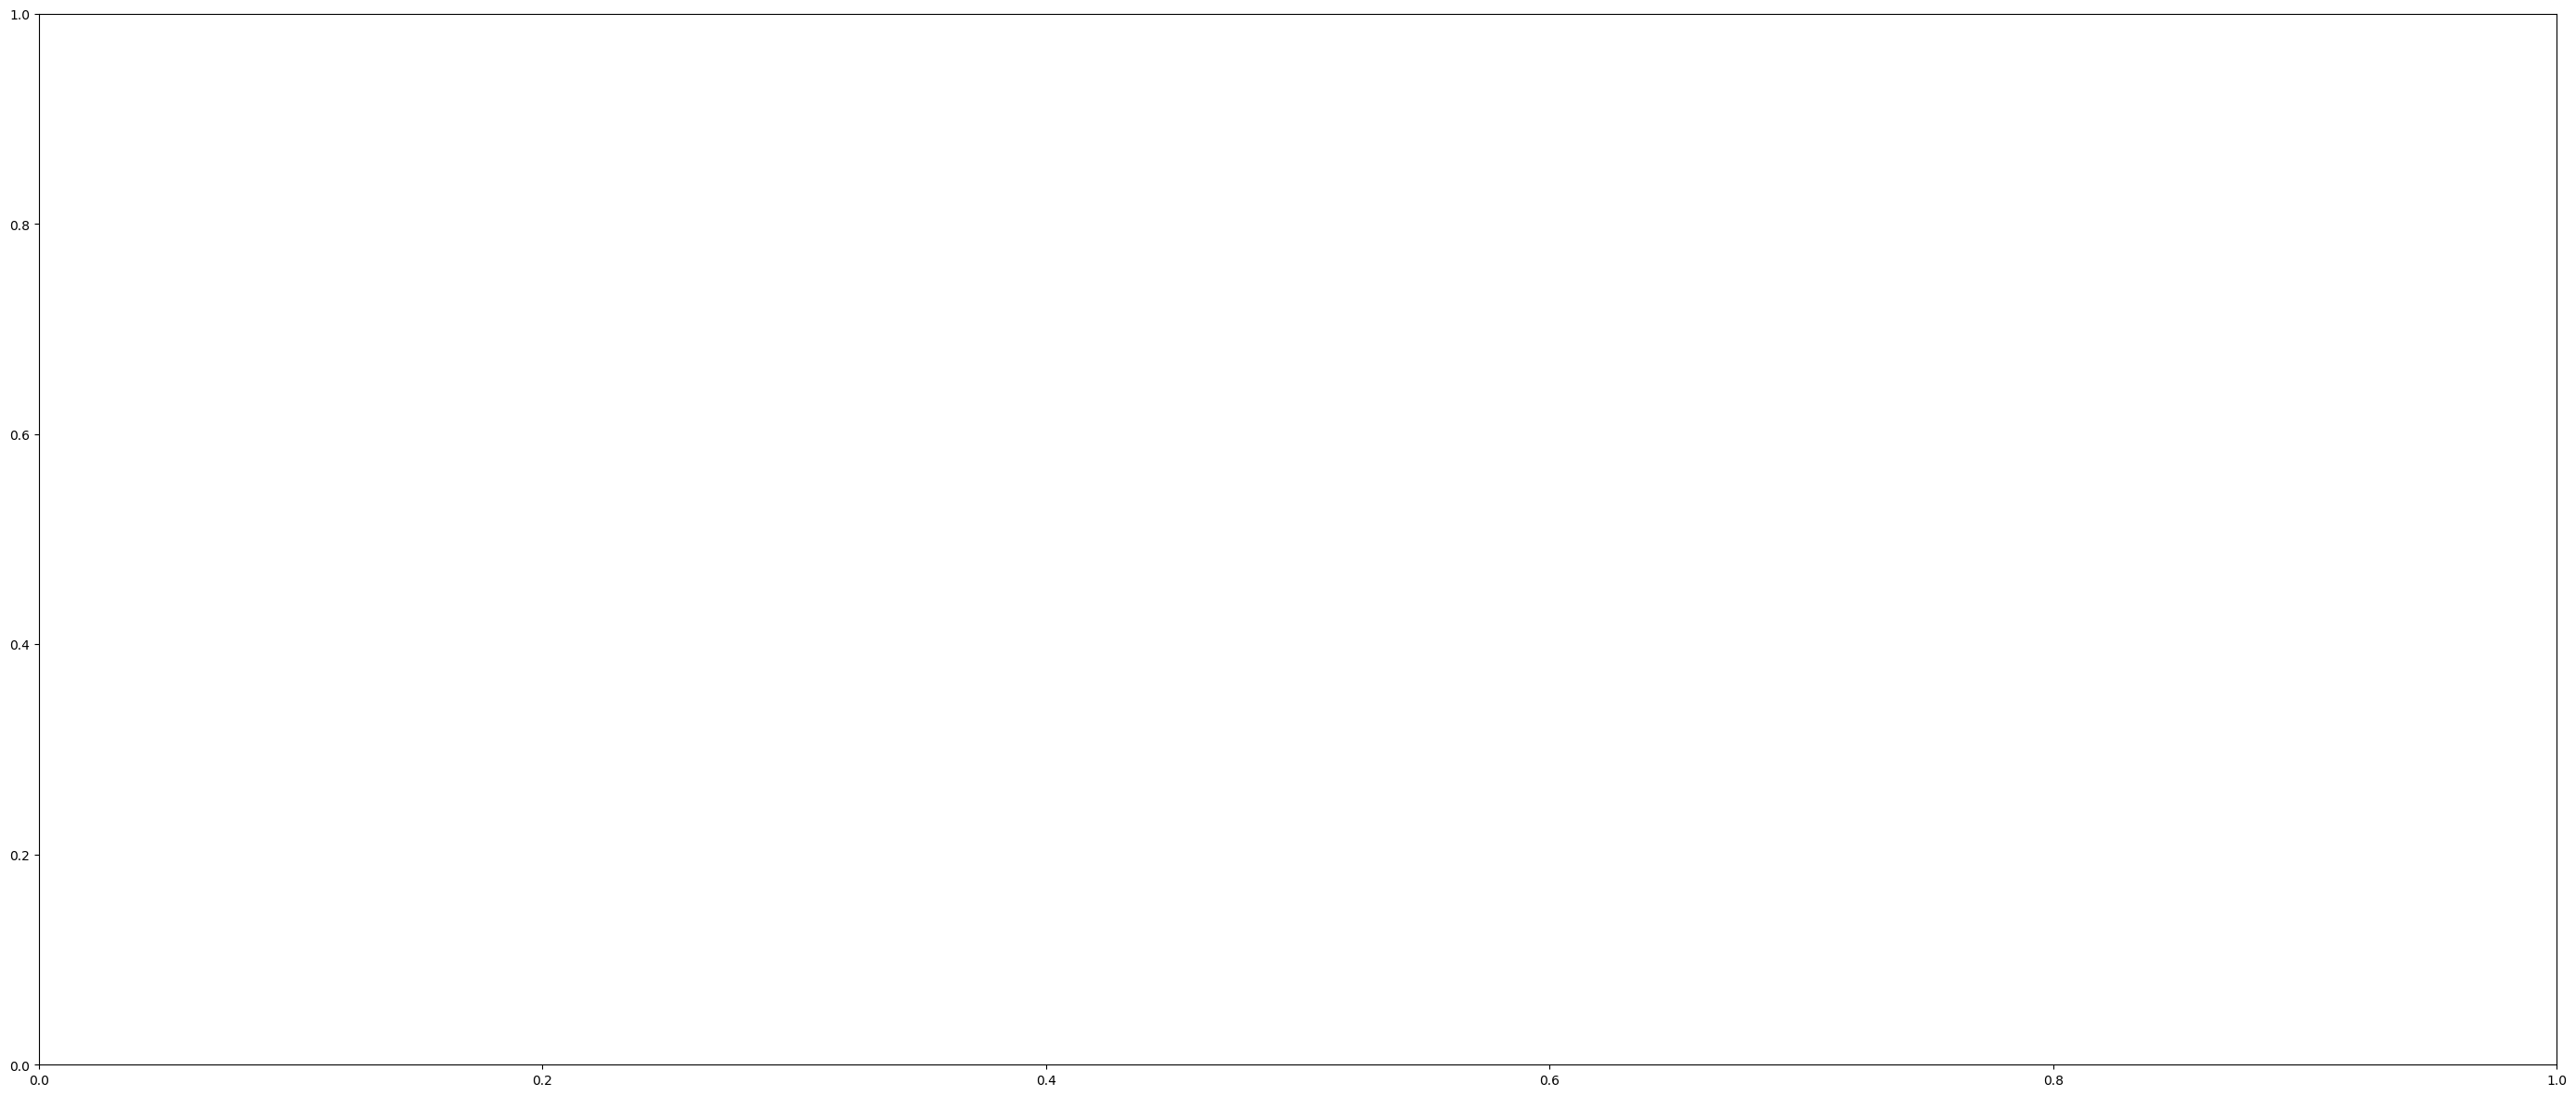

In [51]:
df.name = df.name.str.rsplit(' ',1).str[0]

df = df.sort_values(by='name')

fig, ax = plt.subplots(figsize = (35,15), dpi = 100)

In [52]:
df["White rep"] = (df["Totals All"]*df["white"] - df["total"]*df["White Total"])/(df["total"] - df["white"])

In [53]:
df["White rep"]

4      55.719178
17     78.301115
0     125.582624
13    305.109244
1    -295.444079
2      52.550600
9      85.275229
18     14.338308
14     88.091778
8      76.096457
6     136.190164
5      77.076828
3     292.788546
15    440.272727
16    327.885714
7     844.687500
10     71.459976
11    134.960818
20    233.305136
19    211.636364
22    122.341463
21    -18.497696
12     21.856115
Name: White rep, dtype: float64

In [54]:
white_rep = df['white'].sum()/df['total'].sum()
df["White rep"] = (white_rep * df["Totals All"] - df["White Total"])/(1-white_rep)

In [55]:
df["White rep"]

4     243.054377
17    116.932462
0    -112.907351
13     76.253788
1    -321.605334
2     208.431985
9     200.404970
18    127.814096
14    -35.878085
8     272.172742
6     -40.547753
5     205.083644
3      21.094900
15    178.775825
16   -214.185904
7    -282.368603
10    267.607931
11    192.092649
20    108.985540
19    120.097151
22    124.983289
21    228.297861
12    150.356394
Name: White rep, dtype: float64

In [56]:
df['white'].sum()

5130

In [57]:
df['total'].sum()

16679

In [58]:
for i in df.columns:
    print(i)

OBJECTID_x
facilityid
stateid
name
disttype
distarea
CreationDa
Creator
EditDate
Editor
ShortName
LearnMore
SHAPESTAre
SHAPESTLen
geometry
Schools
Site Code
White M
White F
Black M
Black F
Hispanic M
Hispanic F
Asian M
Asian F
American Indian M
American Indian F
Multi Racial M
Multi Racial F
Totals Male
Totals Female
Totals All
White Total
White %
Asian Total
Asian %
Black Total
Black %
Hispanic Total
Hispanic %
Multi Racial Total
Multi Racial %
American Indian Total
American Indian %
Unnamed: 0
OBJECTID_y
white
black
hispanic
asian
total
% white
% black
% asian
% hispanic
year
White rep


In [61]:
year = 2011
key = str(year)
actual_df = processed_dfs[key]
expected_df = expected_distribution[expected_distribution["year"] == year]
df = actual_df.merge(expected_df, how = "inner", on = "stateid")
df.name = df.name.str.rsplit(' ',1).str[0]

white_rep = df['white'].sum()/df['total'].sum()
df["White rep"] = (white_rep * df["Totals All"] - df["White Total"])/(1-white_rep)
df['White avail'] = df['white'] - df['White Total']
df['White sufficient'] = df['White avail']  - df["White rep"]

In [62]:
for i in df['White sufficient']:
    print(i)

369.8422305338321
86.5262665759945
-112.58976538592313
273.4062393743625
119.19593675620541
-94.49090445426722
138.76853111186674
293.5594185651139
-96.70520231213868
-75.24404964297855
-47.47891873512407
-49.93947636858209
-75.77031621897314
145.92111526691605
262.15938456307384
-114.71718803128186
235.28340700442027
-62.28859231553892
-128.36288677320636
-8.918905134308062
219.10166609996602
-265.8531961917714
-111.7994729683781


In [81]:
def make_rep_plot(year):
    key = str(year)
    actual_df = processed_dfs[key]
    expected_df = expected_distribution[expected_distribution["year"] == year]
    df = actual_df.merge(expected_df, how = "inner", on = "stateid")
    df.name = df.name.str.rsplit(' ',1).str[0]
    
    df = df.sort_values(by='name')
#     fig, ax = plt.subplots(figsize = (35,15), dpi = 100)
# if the population of white is x in a district, in a school it's y 
# and school population total is z, t is the total population of district

# sum(x)/sum(t)
#     x/t = (y+n)/(z+n) => n = (zx - ty)/(t - x)
#   x - expected total whites in durham
#   t - expected total popluation in durham
    fig, ax = plt.subplots(figsize = (35,15), dpi = 100)
    ### Totals All =>
    white_rep_perc = df['white'].sum()/df['total'].sum()
    df["White rep"] = (white_rep_perc * df["Totals All"] - df["White Total"])/(1-white_rep_perc)
    df['White avail'] = df['white'] - df['White Total']
    df['White sufficient'] = df['White avail']  - df["White rep"]
    #df["White rep"] = (df["Totals All"]*df["white"] - df["total"]*df["White Total"])/(df["total"] - df["white"])
#     pd.DataFrame.plot(df, "name", "White Rep")
    names = list(df["name"])
    white_rep = list(df["White rep"])
    
    col_lst = []
    
    for i in df['White sufficient']:
        if i > 0:
            col_lst.append('blue')
        else:
            col_lst.append('red')
    
    ax.bar(names, white_rep, color =col_lst)
    
    ax.set_xlabel("Elementary School Name", fontsize = 30)
    ax.set_ylabel("White Children Needed", fontsize = 30)
    ax.set_title("White school Population change required for fair representation", fontsize = 30)
    ax.set_xticklabels(names, rotation = '90')
    ax.set_ylim([-300,1600])
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    
    #plt.savefig('White School Population Change.png', bbox_inches='tight')
    
#     plt.show()

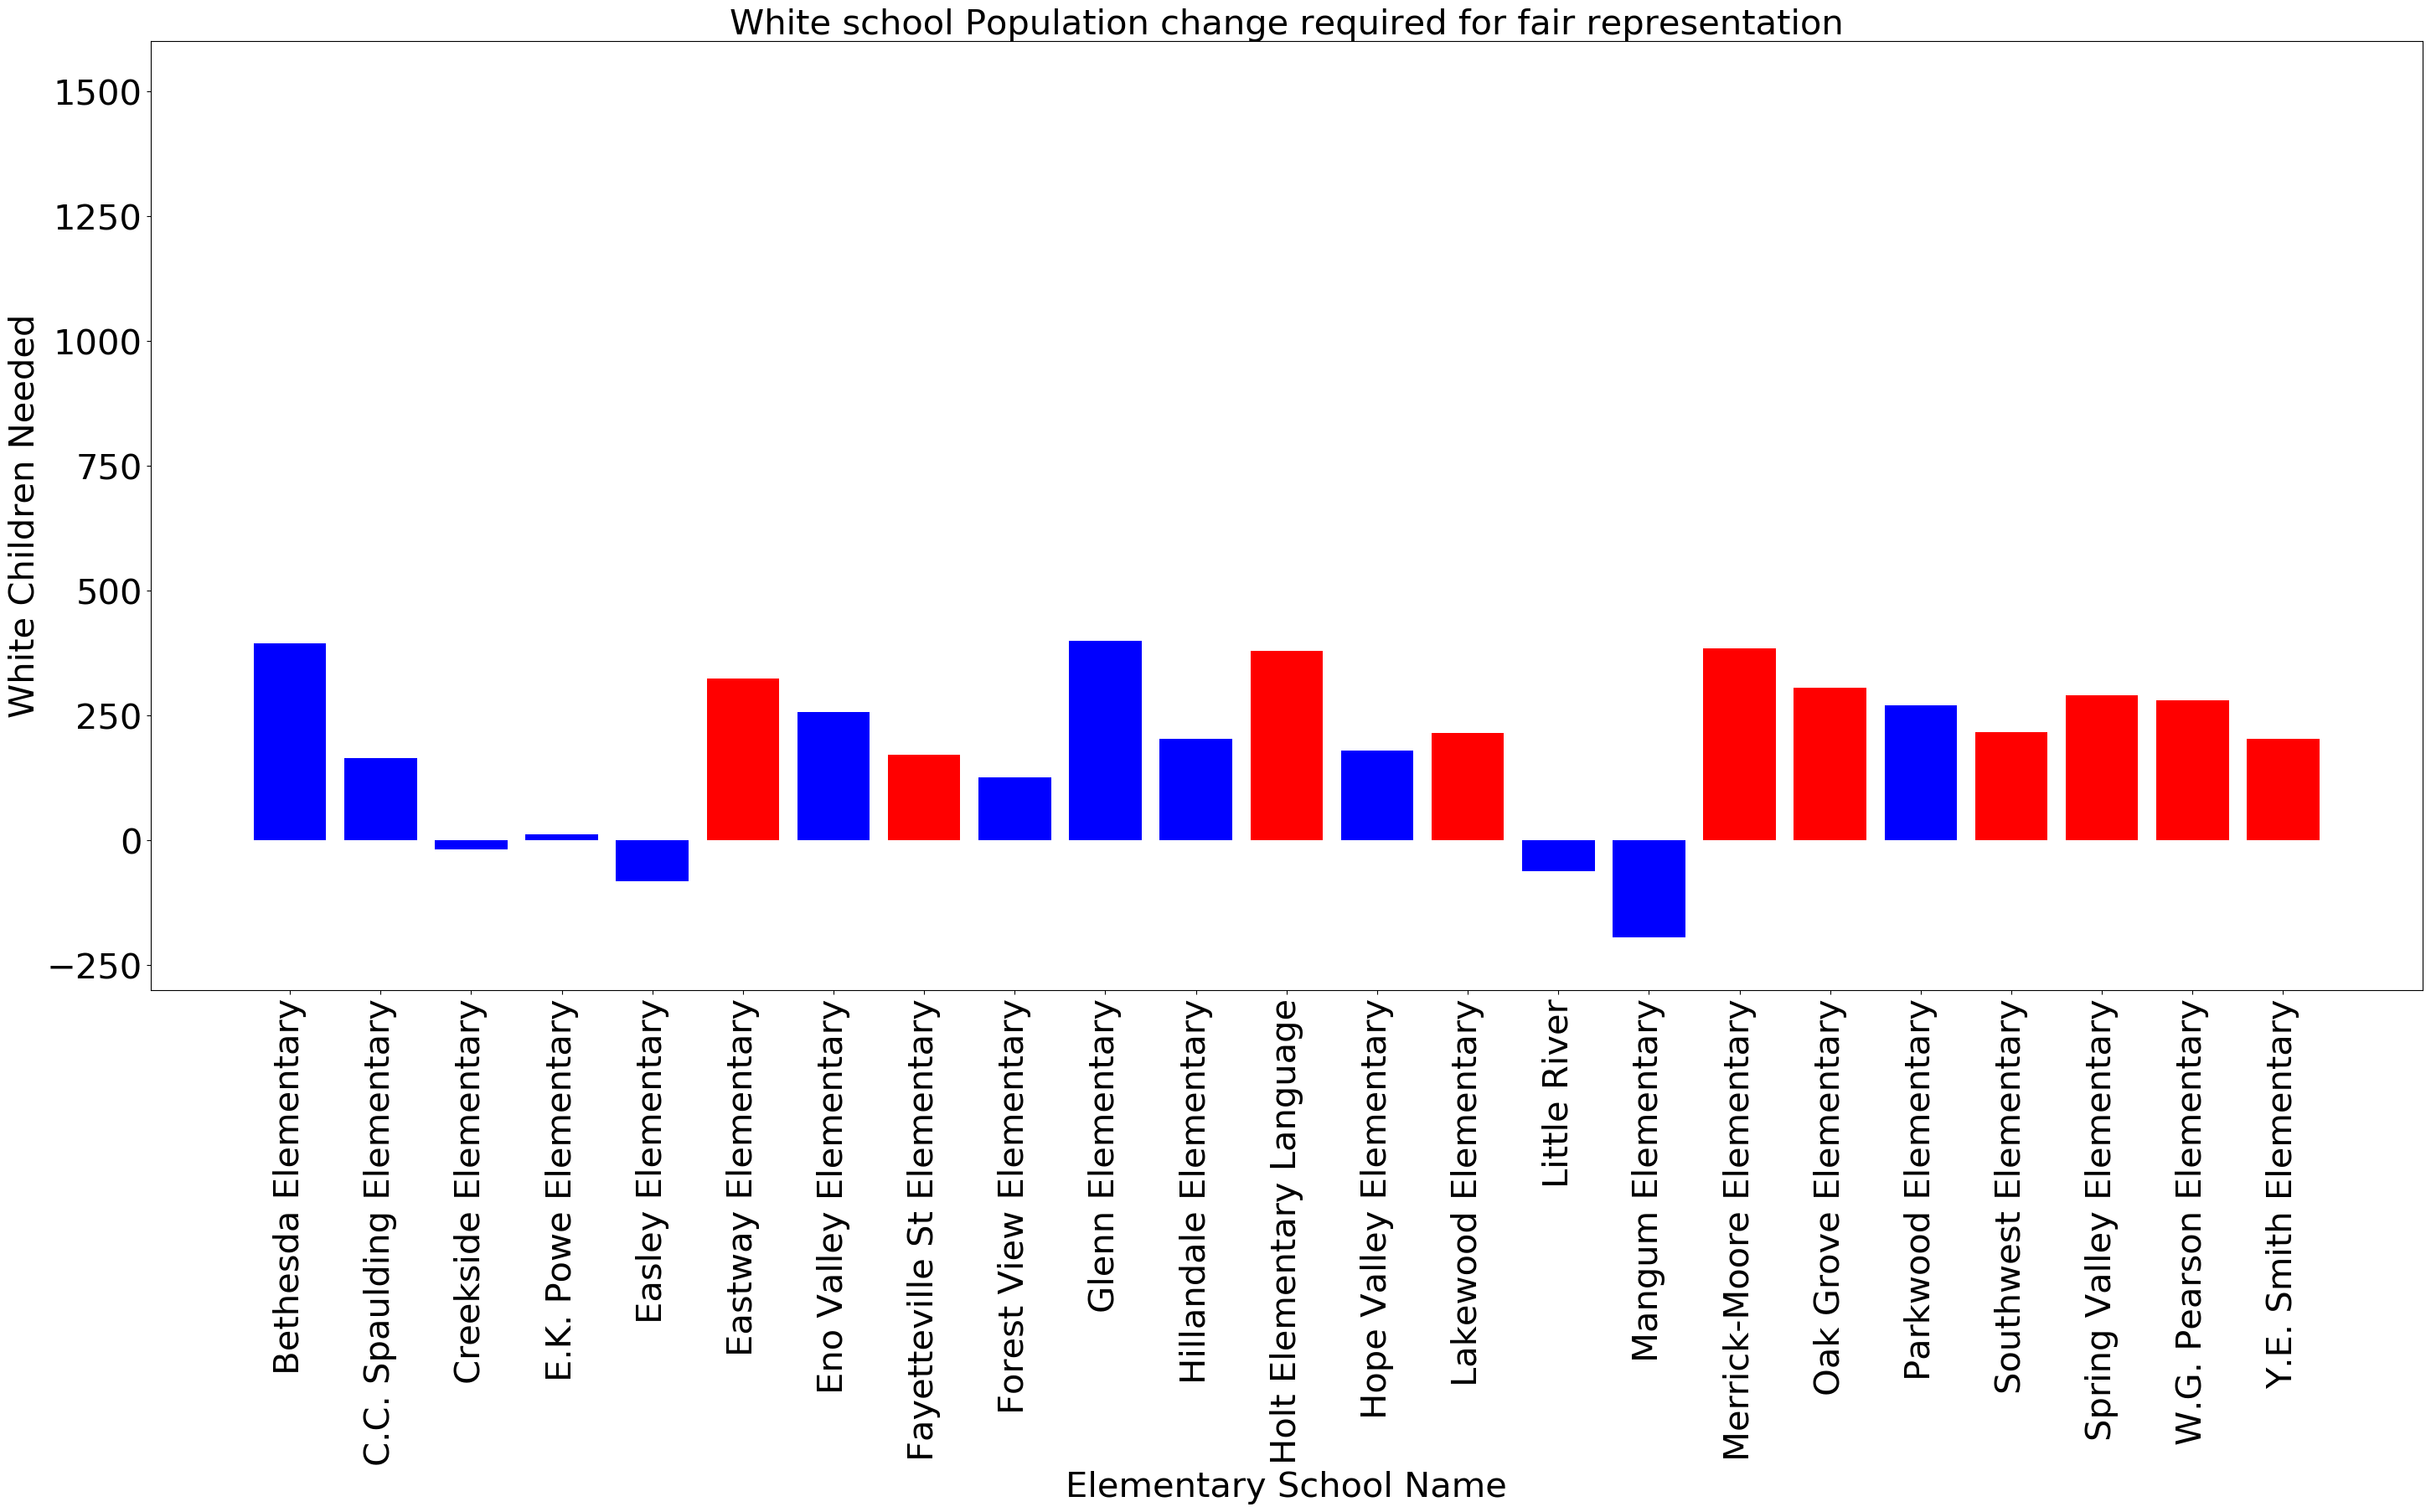

In [80]:
make_rep_plot(year=2018)

In [69]:
interact(make_rep_plot, year=(2010, 2018, 1))

interactive(children=(IntSlider(value=2014, description='year', max=2018, min=2010), Output()), _dom_classes=(…

<function __main__.make_rep_plot(year)>

In [70]:
expected_distribution.columns

Index(['Unnamed: 0', 'OBJECTID', 'stateid', 'white', 'black', 'hispanic',
       'asian', 'total', '% white', '% black', '% asian', '% hispanic',
       'year'],
      dtype='object')

In [71]:
interact(make_rep_plot, year=(2011, 2018, 1))
plt.show()

interactive(children=(IntSlider(value=2014, description='year', max=2018, min=2011), Output()), _dom_classes=(…

In [84]:
def make_rep_plot_avail(year):
    key = str(year)
    actual_df = processed_dfs[key]
    expected_df = expected_distribution[expected_distribution["year"] == year]
    df = actual_df.merge(expected_df, how = "inner", on = "stateid")
    df.name = df.name.str.rsplit(' ',1).str[0]
    
    df = df.sort_values(by='name')
#     fig, ax = plt.subplots(figsize = (35,15), dpi = 100)
# if the population of white is x in a district, in a school it's y 
# and school population total is z, t is the total population of district

# sum(x)/sum(t)
#     x/t = (y+n)/(z+n) => n = (zx - ty)/(t - x)
#   x - expected total whites in durham
#   t - expected total popluation in durham
    fig, ax = plt.subplots(figsize = (35,15), dpi = 100)
    ### Totals All =>
    white_rep_perc = df['white'].sum()/df['total'].sum()
    df["White rep"] = (white_rep_perc * df["Totals All"] - df["White Total"])/(1-white_rep_perc)
    df['White avail'] = df['white'] - df['White Total']
    df['White sufficient'] = df['White avail']  - df["White rep"]
    #df["White rep"] = (df["Totals All"]*df["white"] - df["total"]*df["White Total"])/(df["total"] - df["white"])
#     pd.DataFrame.plot(df, "name", "White Rep")
    names = list(df["name"])
    white_rep = list(df["White sufficient"])
    ax.bar(names, white_rep)
    ax.set_xlabel("Elementary School Name", fontsize = 30)
    ax.set_ylabel("White Children Population", fontsize = 30)
    ax.set_title("White Children Not in Public Schools after fair representation", fontsize = 30)
    ax.set_xticklabels(names, rotation = '90')
    ax.set_ylim([-300,1600])
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    
    plt.savefig('White School Population Change remaining.png', bbox_inches='tight')
    
    
#     plt.show()

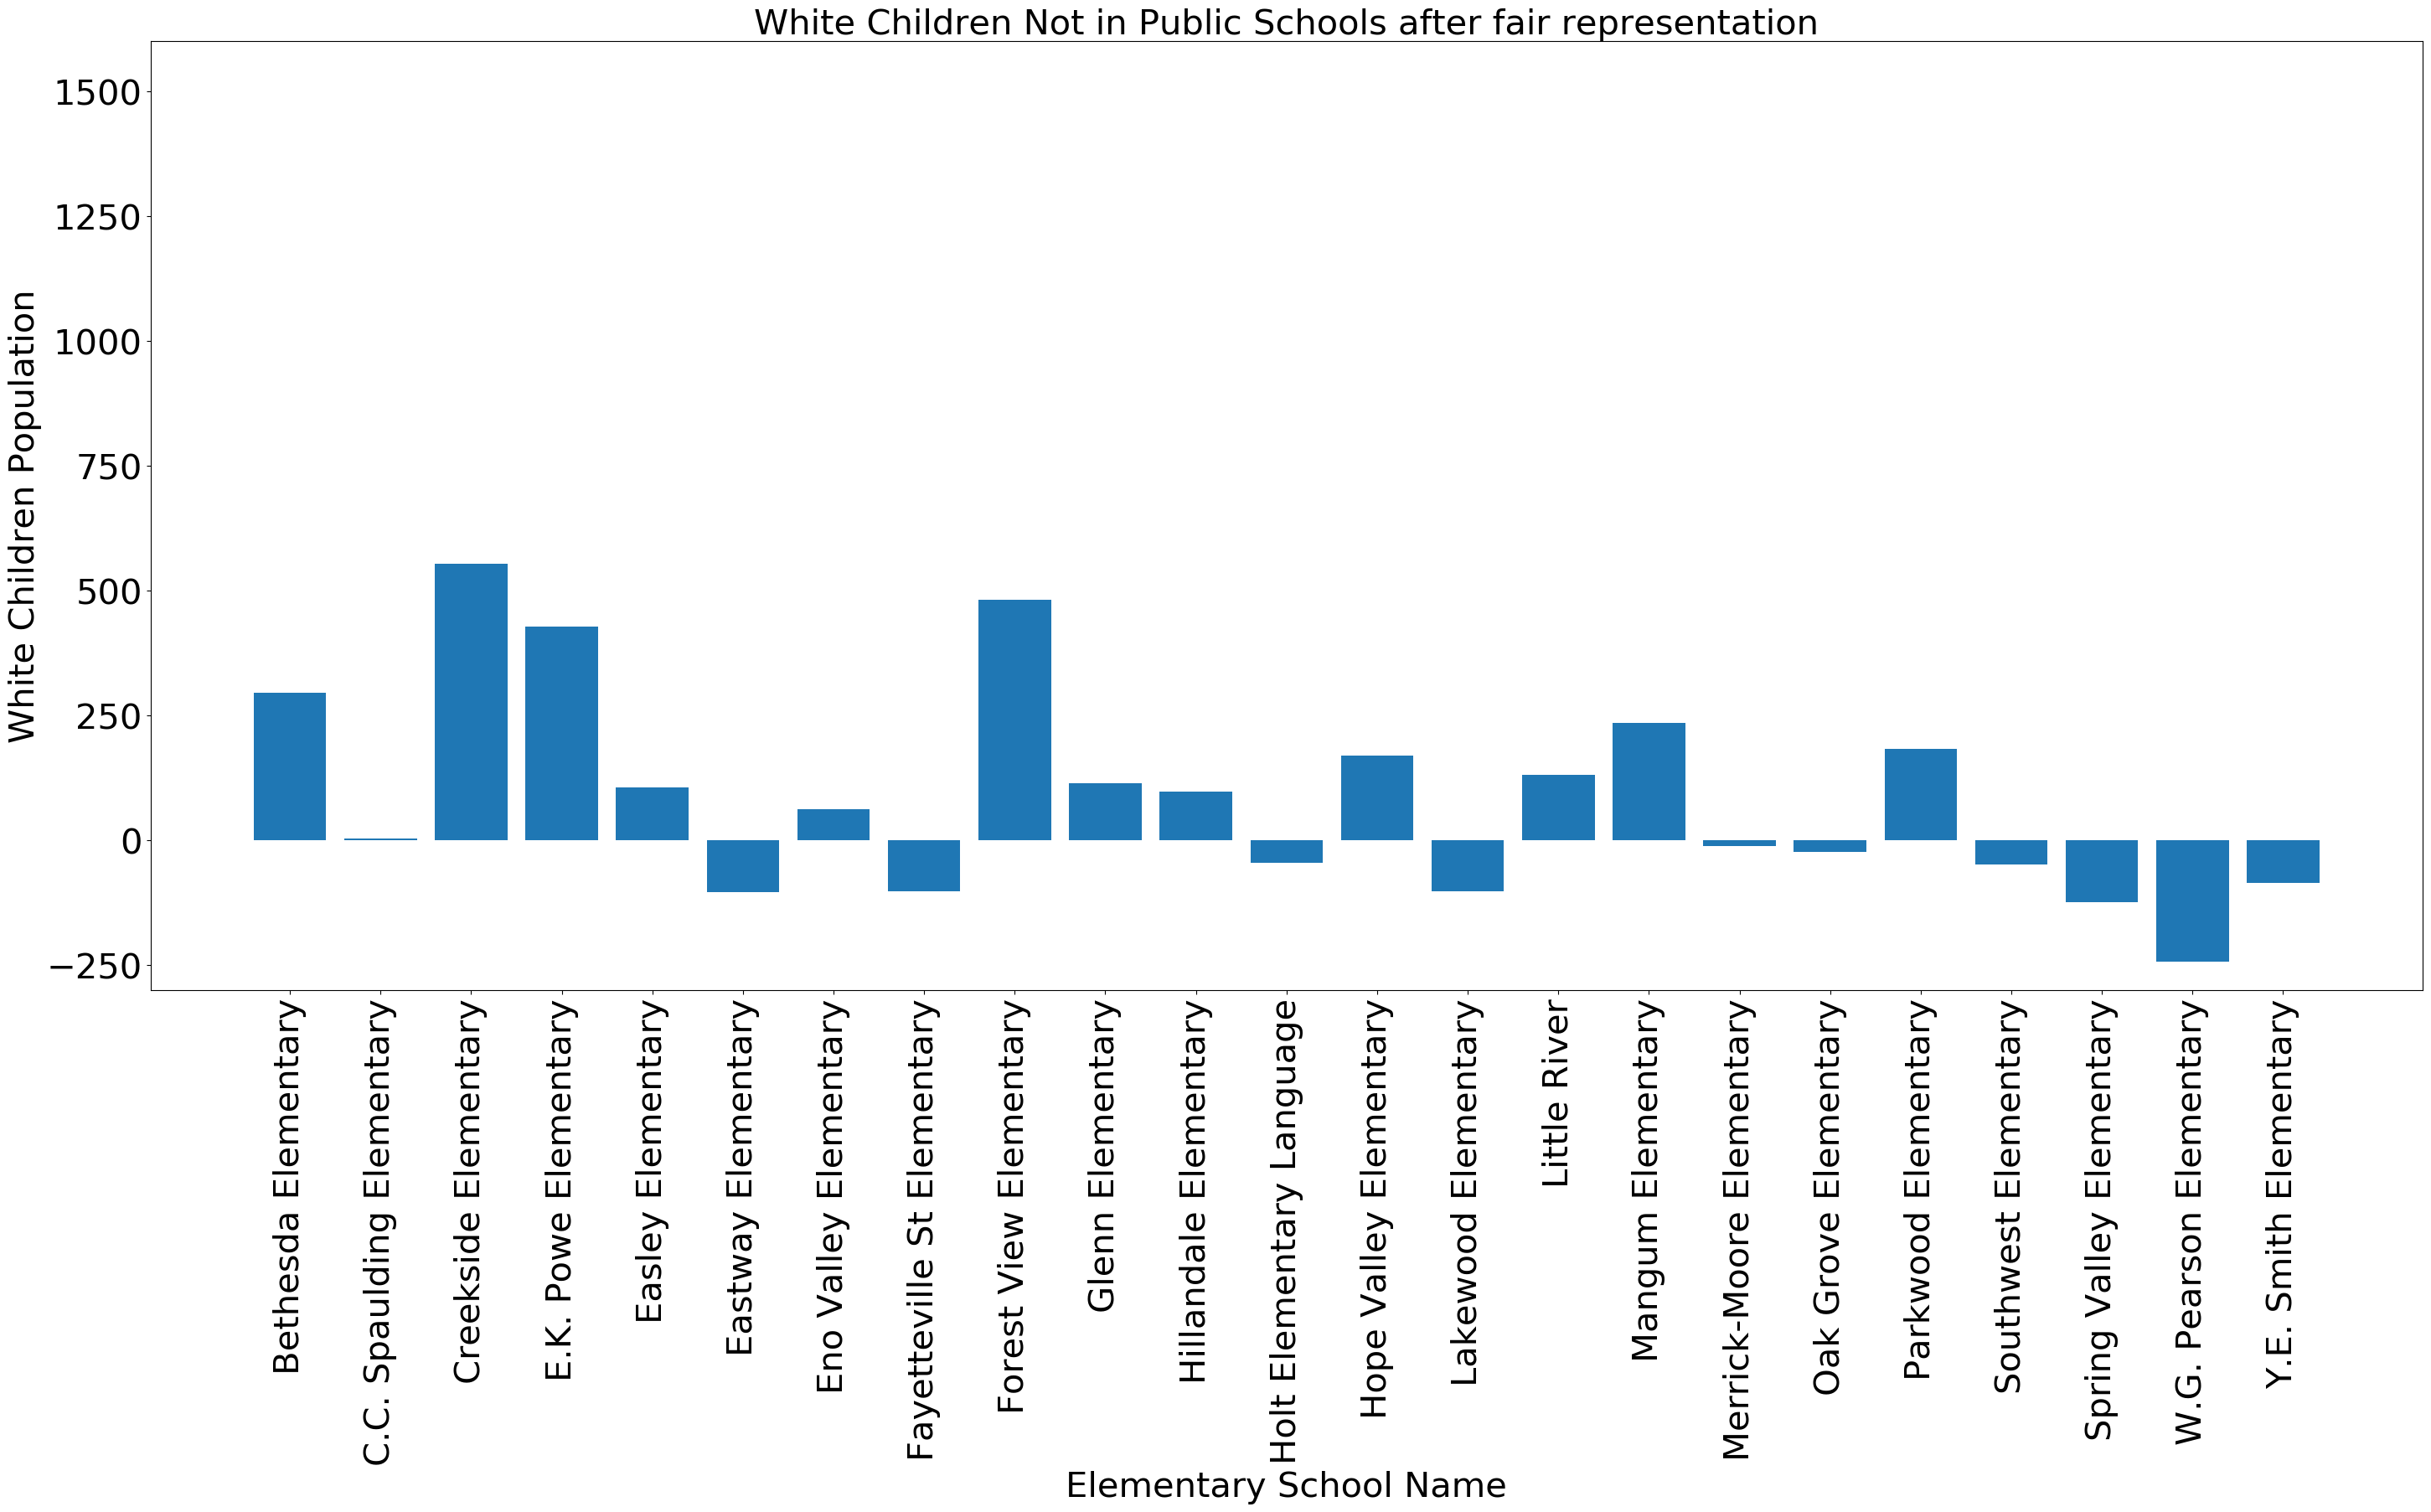

In [85]:
make_rep_plot_avail(2018)

In [73]:
interact(make_rep_plot_avail, year=(2011, 2018, 1))
plt.show()

interactive(children=(IntSlider(value=2014, description='year', max=2018, min=2011), Output()), _dom_classes=(…